In [ ]:
path="/content/drive/MyDrive/csvFiles/groceries.csv"

در قسمت بالا ما مسیر دیتاست را تعریف میکنیم

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from itertools import permutations

In [ ]:
df = pd.read_csv(path, header=None)

دیتاست ما حاوی 32 ستون  می باشدکه تنوع تعداد کالا ها در یک تراکنش را نشان می دهد

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


اطلاعات آماری مربوط به هریک از ستون ها را مشاهده می کنید

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,shopping bags,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

In [ ]:
df.shape

(9835, 32)

In [ ]:
type_list = []
for i in range(32):
    type_list.extend(df[i].unique().tolist())


In [ ]:
items=list(np.unique(type_list))
len(items)

170

در قسمت زیر ما تک تک آیتم هارا با پیشوند شماره تراکنش به ستون تبدیل کرده و درآینده ما فقط مقادیر یونیک را نگه خواهیم داشت

In [ ]:
dummies = pd.get_dummies(df, columns=df.columns)
dummies

,0_Instant food products,0_UHT-milk,0_abrasive cleaner,0_artif. sweetener,0_baby cosmetics,0_bags,0_baking powder,0_bathroom cleaner,0_beef,0_berries,...,27_chocolate,27_hygiene articles,27_napkins,27_sugar,28_cooking chocolate,28_house keeping products,28_soups,29_skin care,30_hygiene articles,31_candles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

df2 = pd.DataFrame()
for col in items:
    df2[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)


<ipython-input-29-7ae33108da7d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)
<ipython-input-29-7ae33108da7d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)
<ipython-input-29-7ae33108da7d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [ ]:
df2["sum"] = df2.sum(axis=1)


با در نظر گرفتن مقادیر یونیک 170 ستون خواهیم داشت

In [ ]:
df2

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,21.0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
9832,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,12.0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0


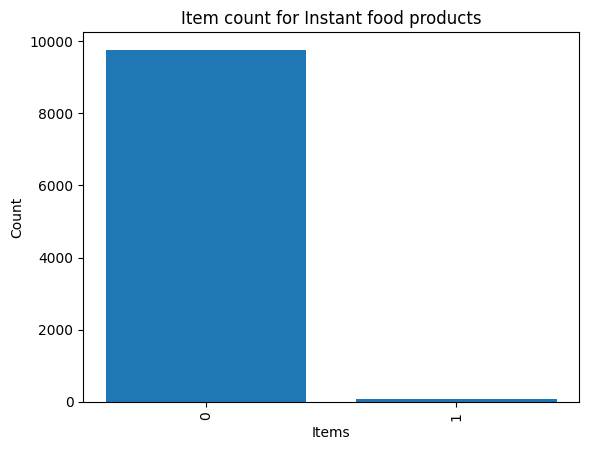

Instant food products   0    9756
1      79
Name: Instant food products, dtype: int64


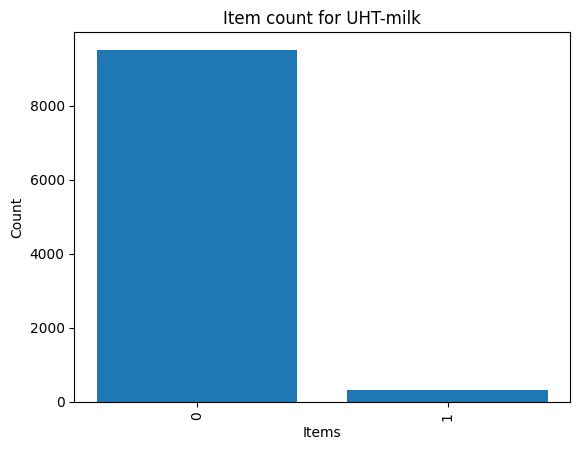

UHT-milk   0    9506
1     329
Name: UHT-milk, dtype: int64


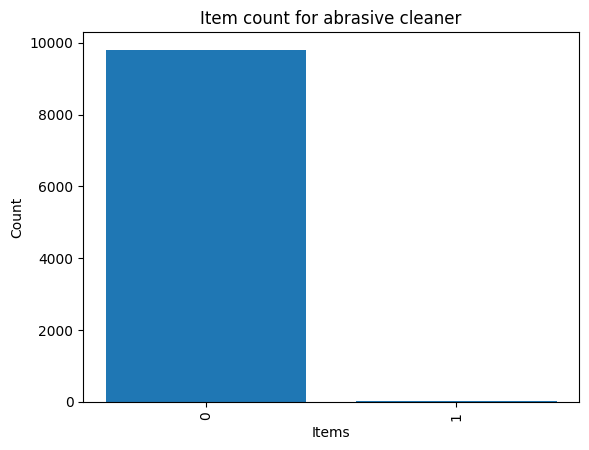

abrasive cleaner   0    9800
1      35
Name: abrasive cleaner, dtype: int64


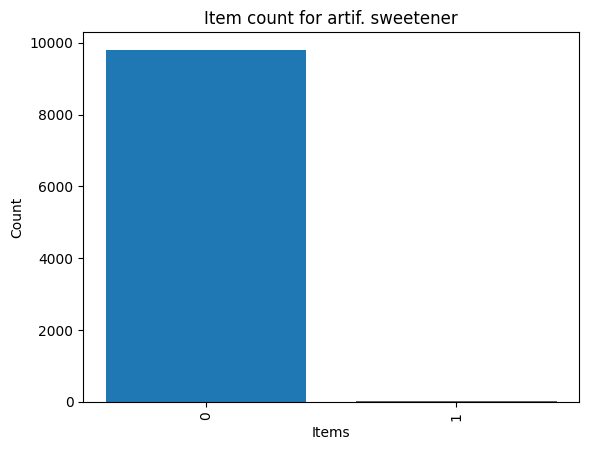

artif. sweetener   0    9803
1      32
Name: artif. sweetener, dtype: int64


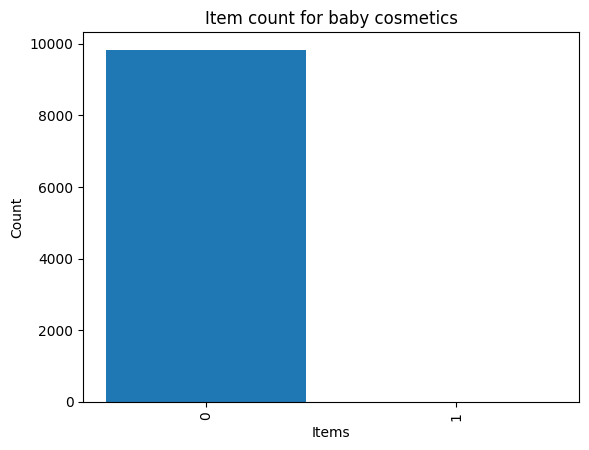

baby cosmetics   0    9829
1       6
Name: baby cosmetics, dtype: int64


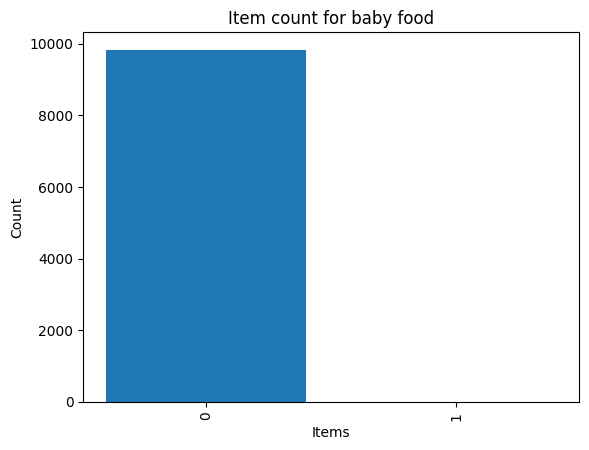

baby food   0    9834
1       1
Name: baby food, dtype: int64


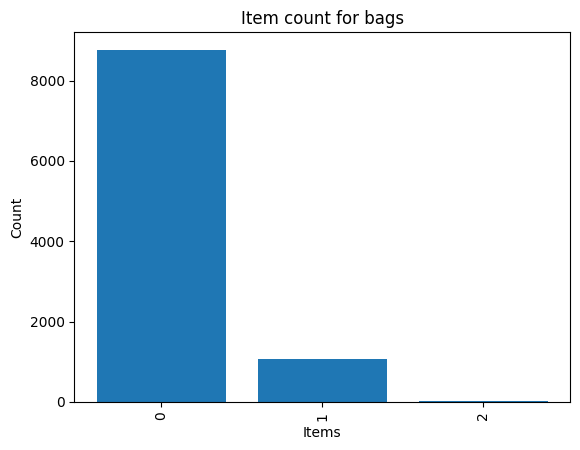

bags   0    8765
1    1055
2      15
Name: bags, dtype: int64


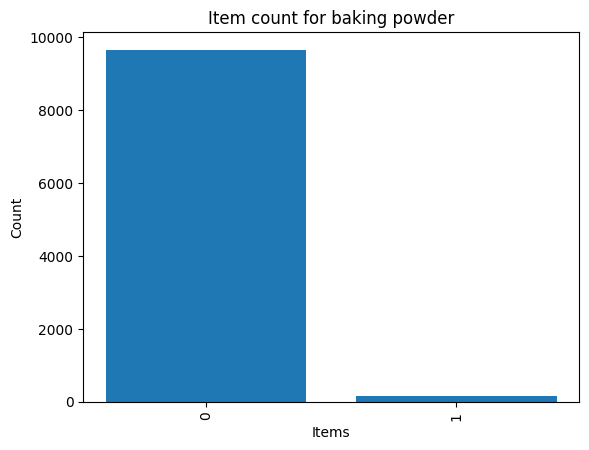

baking powder   0    9661
1     174
Name: baking powder, dtype: int64


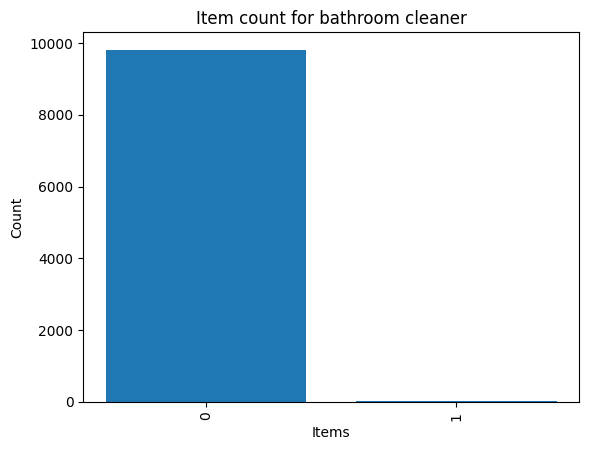

bathroom cleaner   0    9808
1      27
Name: bathroom cleaner, dtype: int64


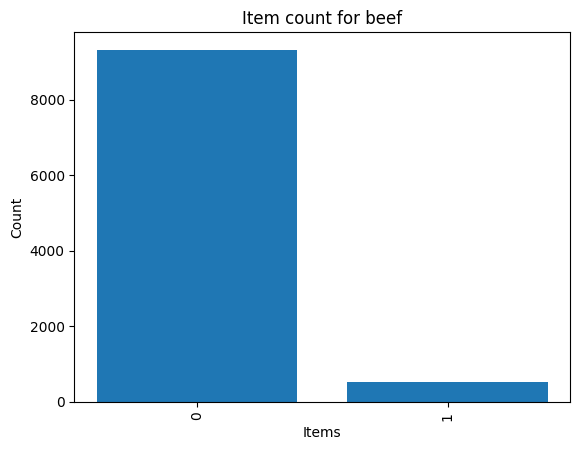

beef   0    9319
1     516
Name: beef, dtype: int64


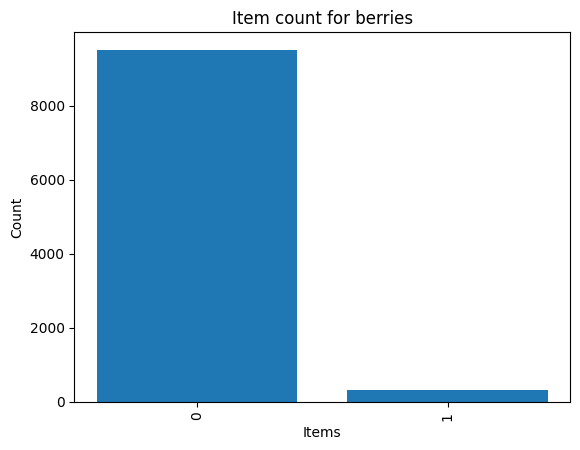

berries   0    9508
1     327
Name: berries, dtype: int64


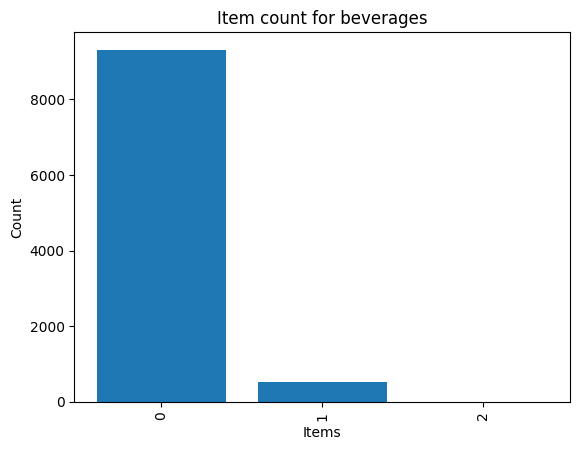

beverages   0    9309
1     517
2       9
Name: beverages, dtype: int64


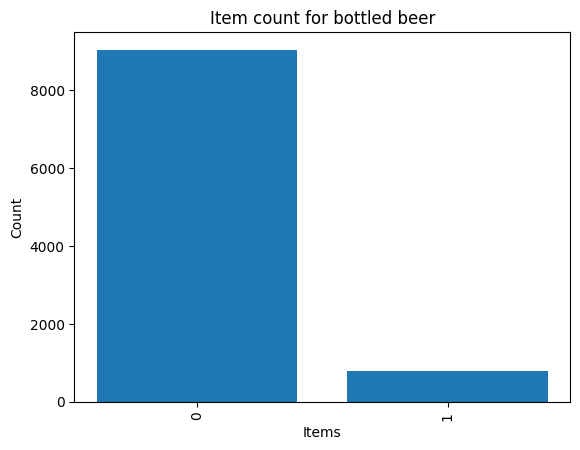

bottled beer   0    9043
1     792
Name: bottled beer, dtype: int64


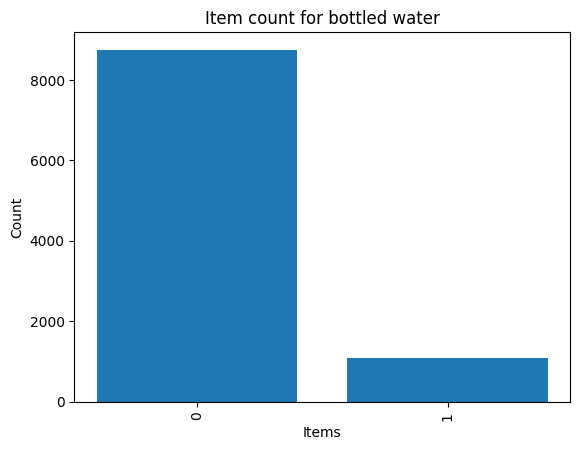

bottled water   0    8748
1    1087
Name: bottled water, dtype: int64


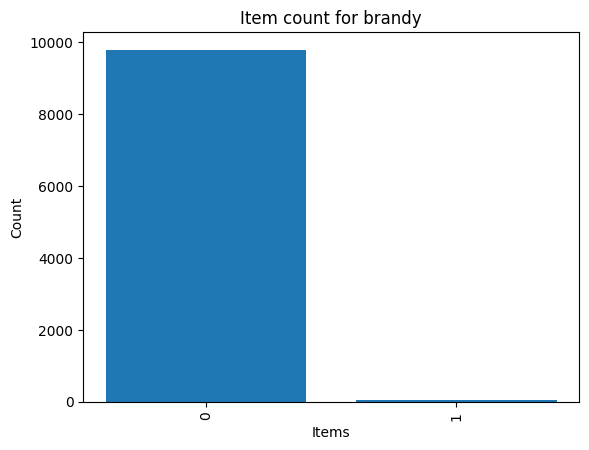

brandy   0    9794
1      41
Name: brandy, dtype: int64


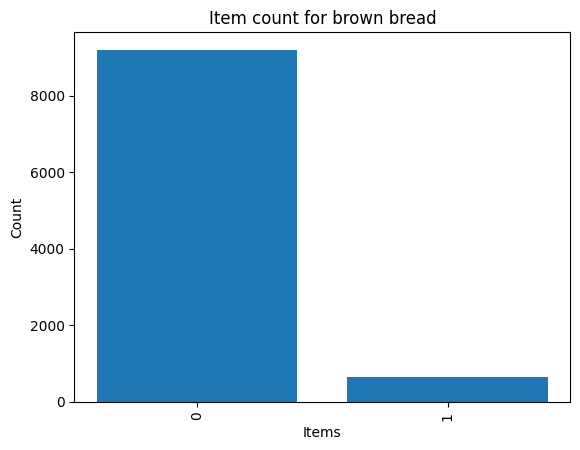

brown bread   0    9197
1     638
Name: brown bread, dtype: int64


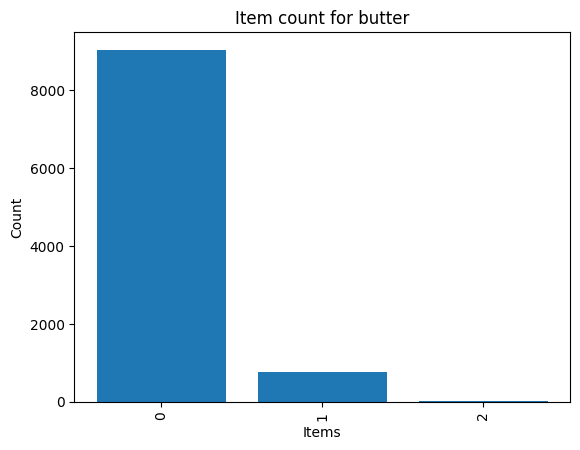

butter   0    9036
1     778
2      21
Name: butter, dtype: int64


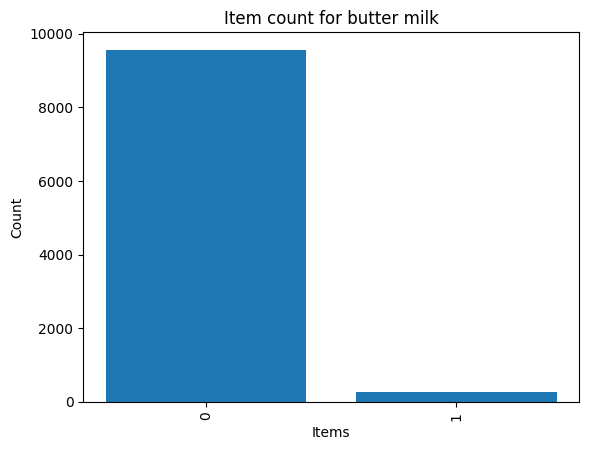

butter milk   0    9560
1     275
Name: butter milk, dtype: int64


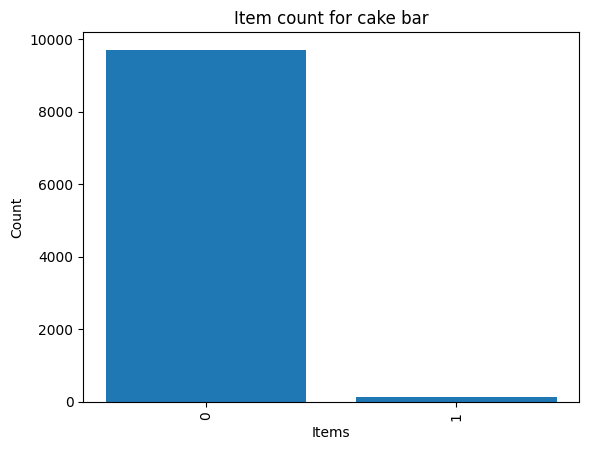

cake bar   0    9705
1     130
Name: cake bar, dtype: int64


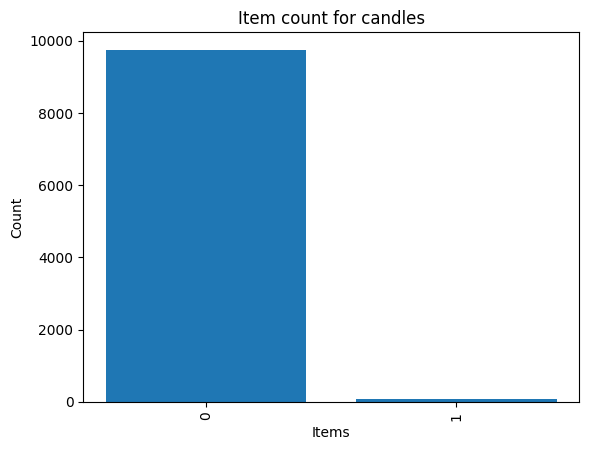

candles   0    9747
1      88
Name: candles, dtype: int64


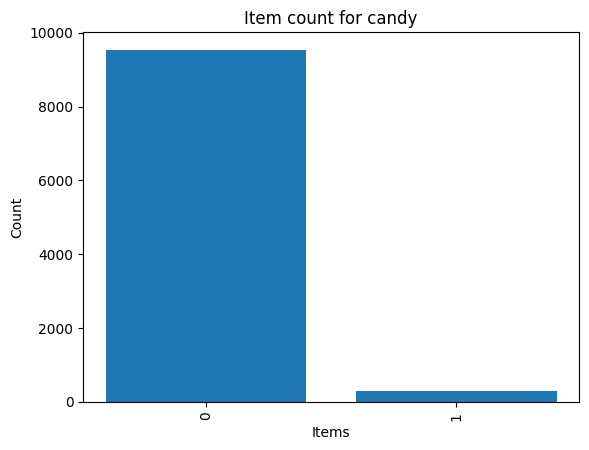

candy   0    9541
1     294
Name: candy, dtype: int64


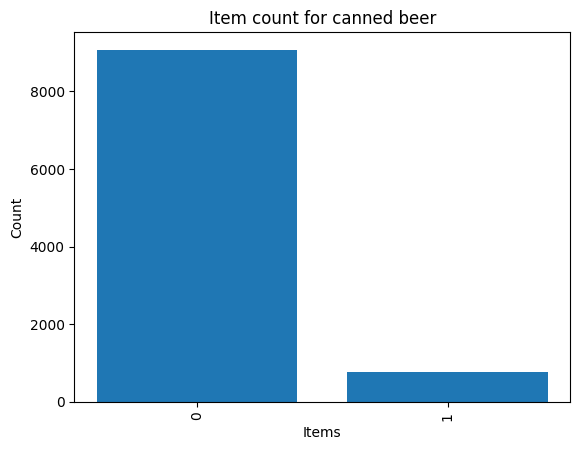

canned beer   0    9071
1     764
Name: canned beer, dtype: int64


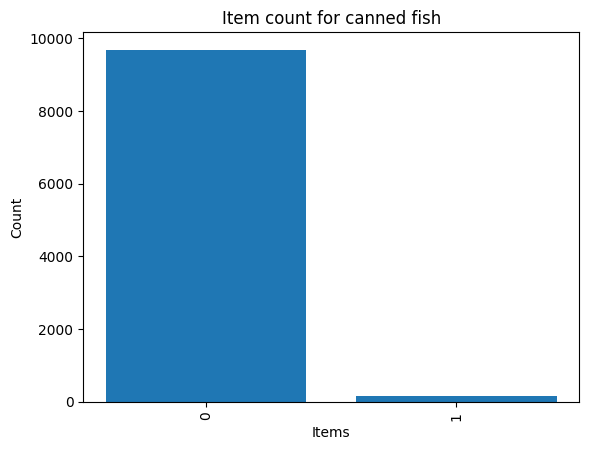

canned fish   0    9687
1     148
Name: canned fish, dtype: int64


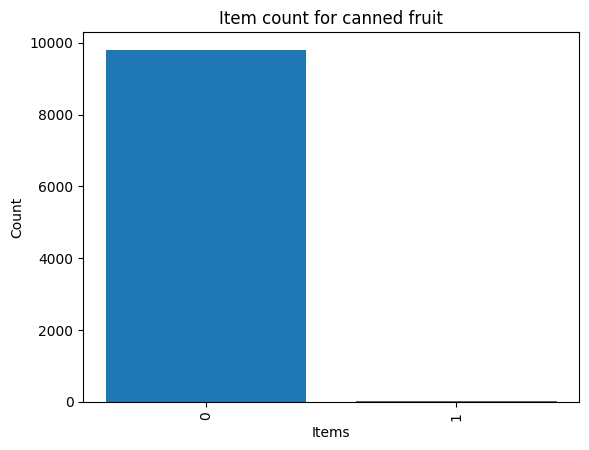

canned fruit   0    9803
1      32
Name: canned fruit, dtype: int64


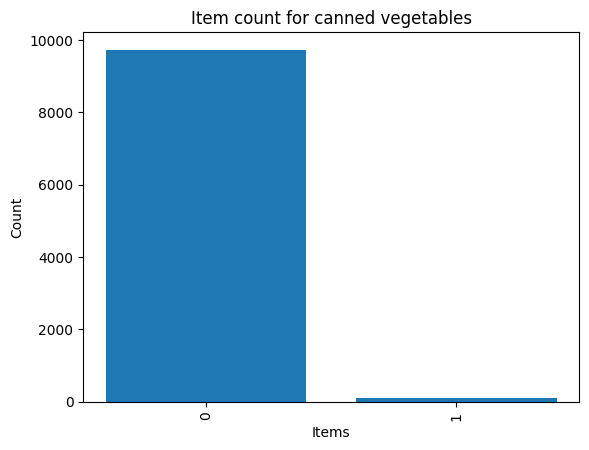

canned vegetables   0    9729
1     106
Name: canned vegetables, dtype: int64


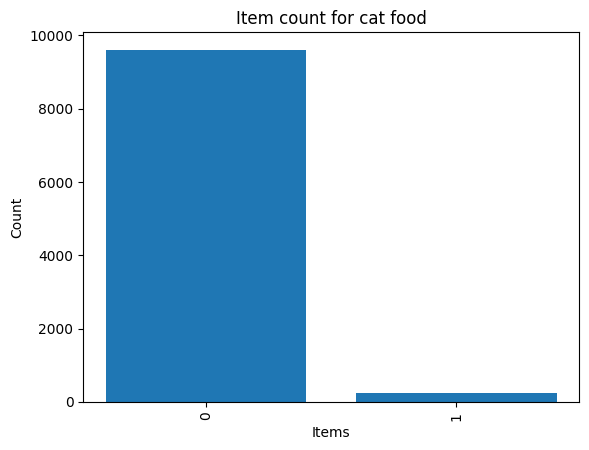

cat food   0    9606
1     229
Name: cat food, dtype: int64


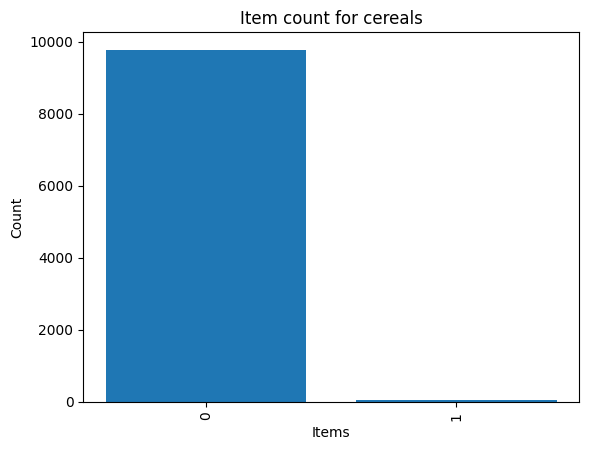

cereals   0    9779
1      56
Name: cereals, dtype: int64


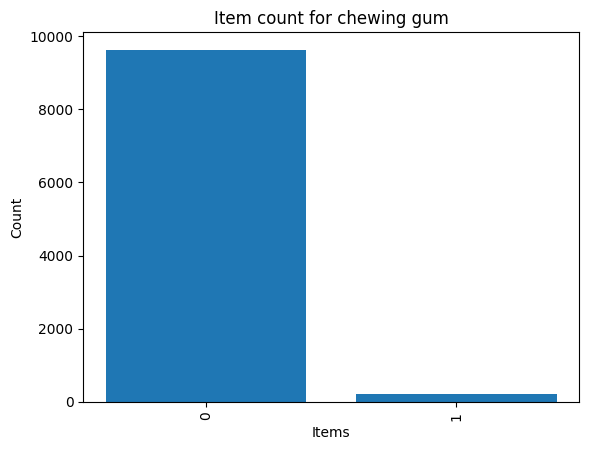

chewing gum   0    9628
1     207
Name: chewing gum, dtype: int64


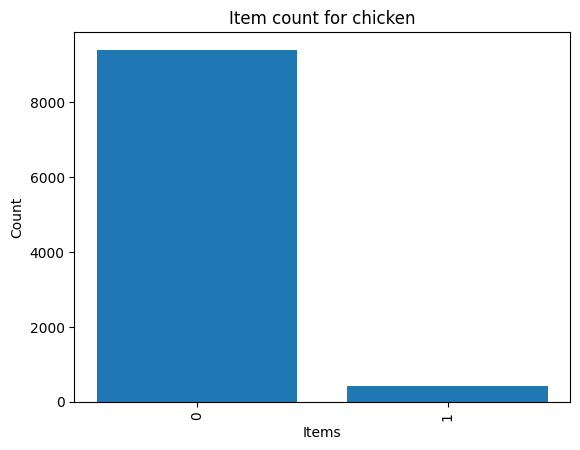

chicken   0    9407
1     428
Name: chicken, dtype: int64


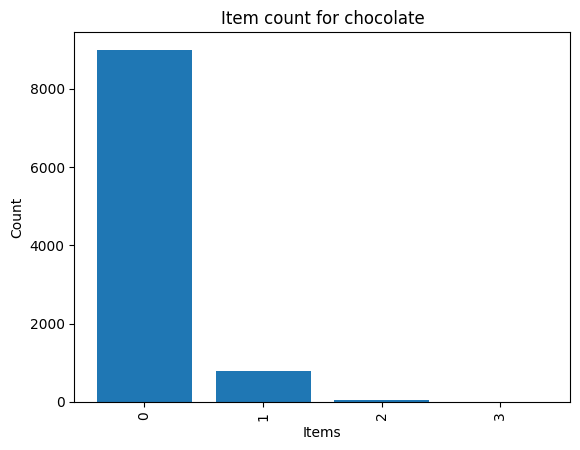

chocolate   0    8990
1     791
2      52
3       2
Name: chocolate, dtype: int64


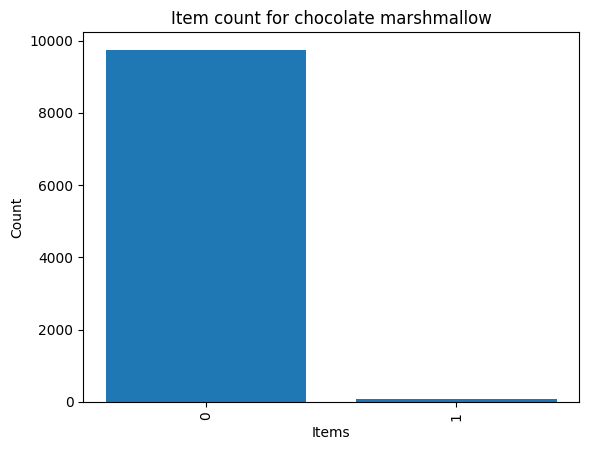

chocolate marshmallow   0    9746
1      89
Name: chocolate marshmallow, dtype: int64


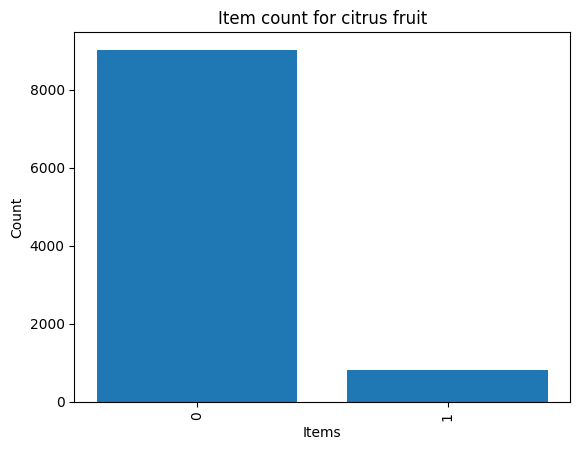

citrus fruit   0    9021
1     814
Name: citrus fruit, dtype: int64


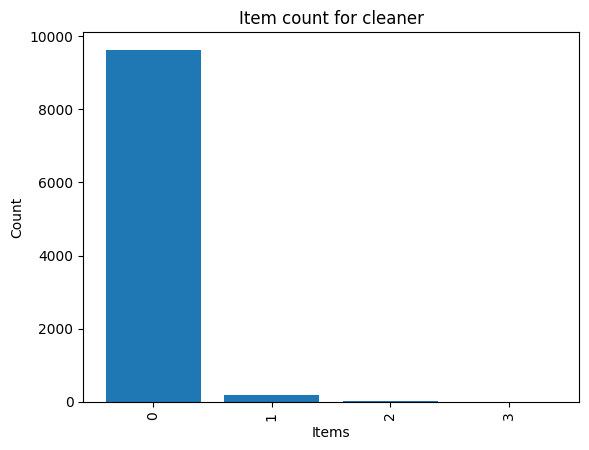

cleaner   0    9628
1     193
2      13
3       1
Name: cleaner, dtype: int64


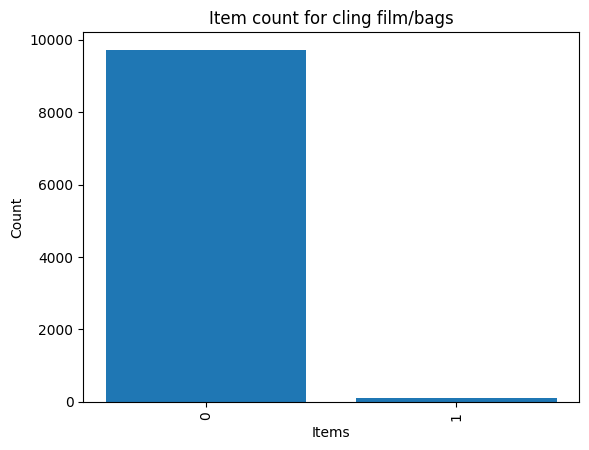

cling film/bags   0    9723
1     112
Name: cling film/bags, dtype: int64


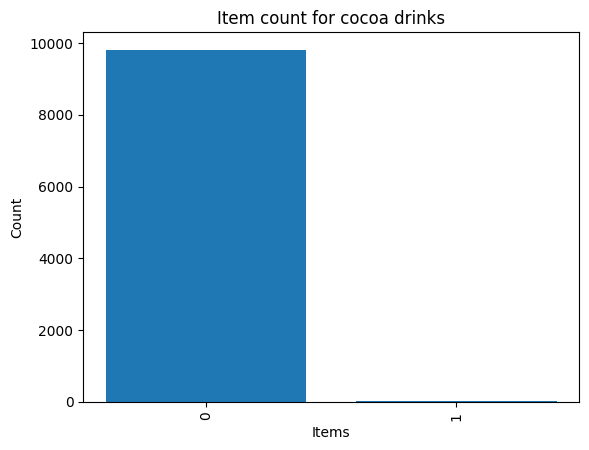

cocoa drinks   0    9813
1      22
Name: cocoa drinks, dtype: int64


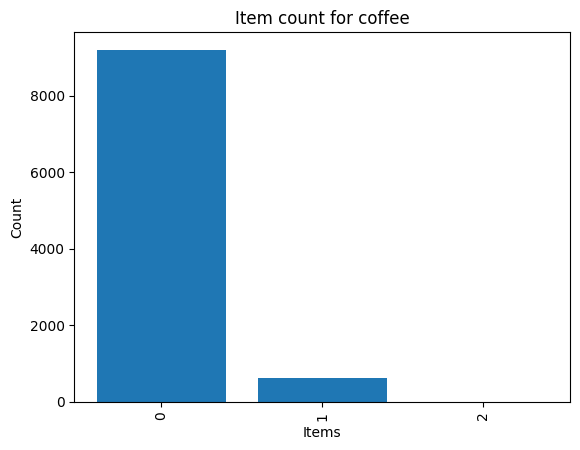

coffee   0    9197
1     632
2       6
Name: coffee, dtype: int64


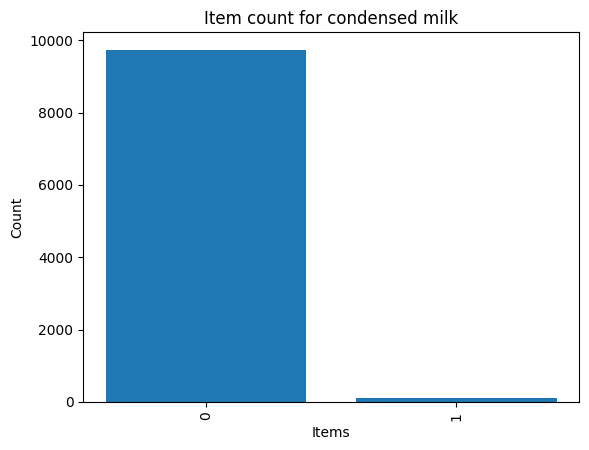

condensed milk   0    9734
1     101
Name: condensed milk, dtype: int64


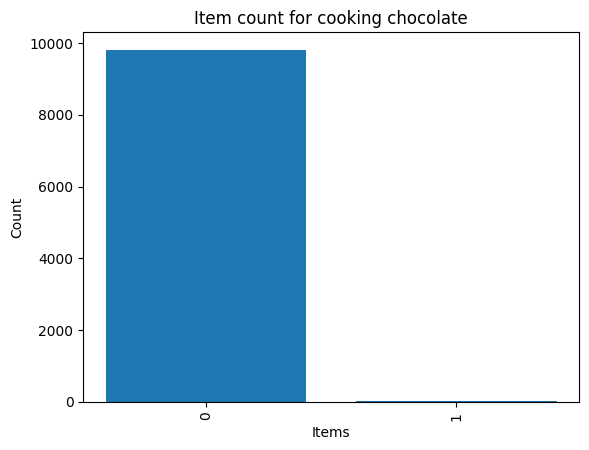

cooking chocolate   0    9810
1      25
Name: cooking chocolate, dtype: int64


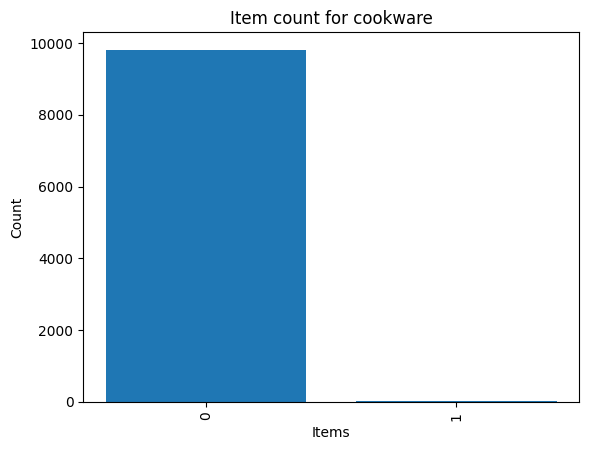

cookware   0    9808
1      27
Name: cookware, dtype: int64


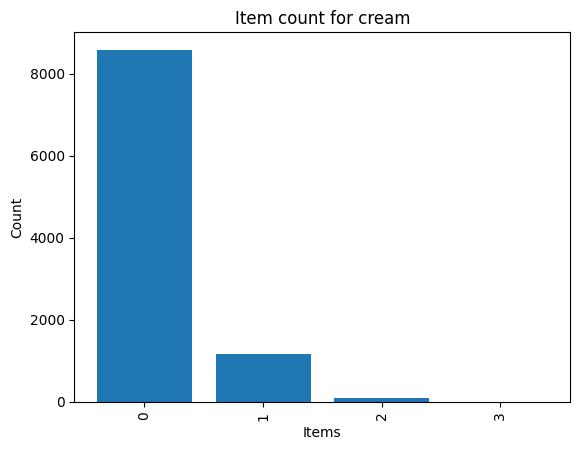

cream   0    8581
1    1157
2      94
3       3
Name: cream, dtype: int64


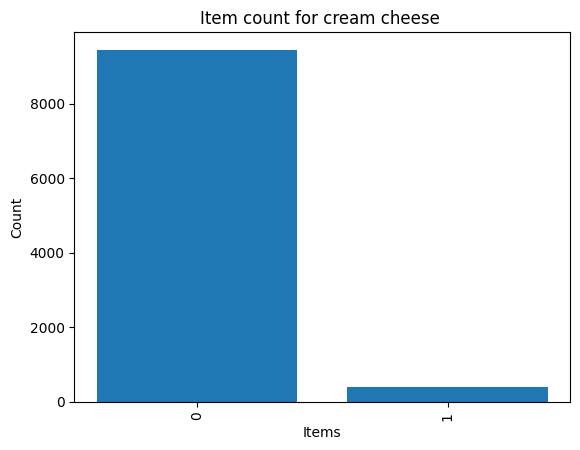

cream cheese    0    9445
1     390
Name: cream cheese , dtype: int64


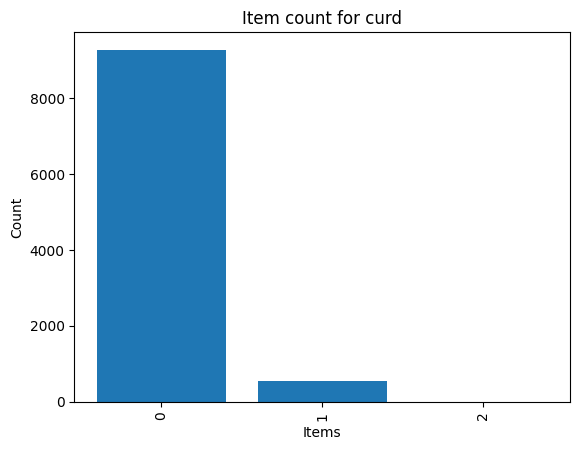

curd   0    9268
1     560
2       7
Name: curd, dtype: int64


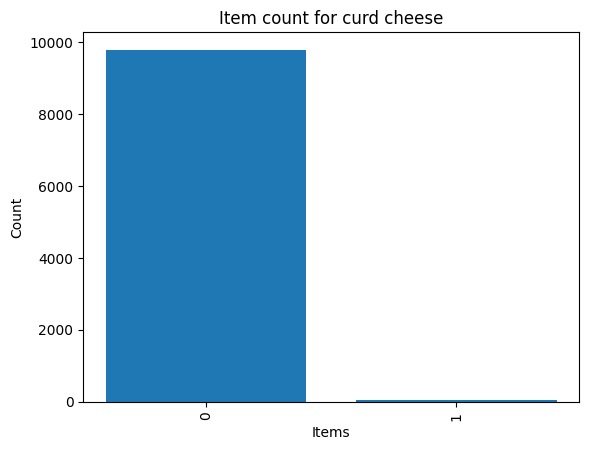

curd cheese   0    9785
1      50
Name: curd cheese, dtype: int64


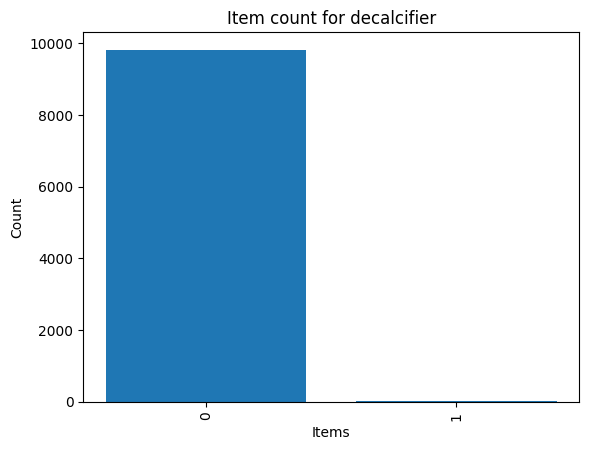

decalcifier   0    9820
1      15
Name: decalcifier, dtype: int64


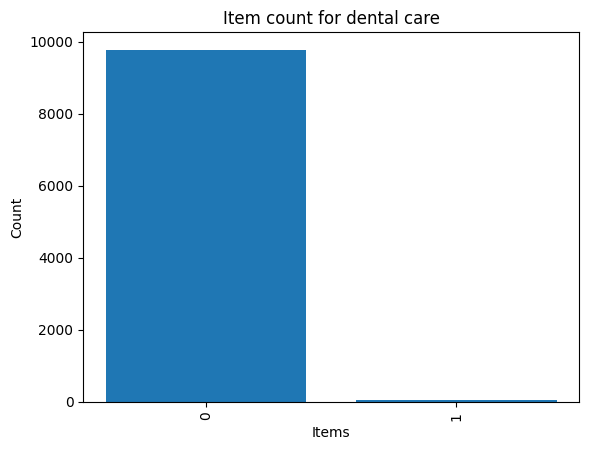

dental care   0    9778
1      57
Name: dental care, dtype: int64


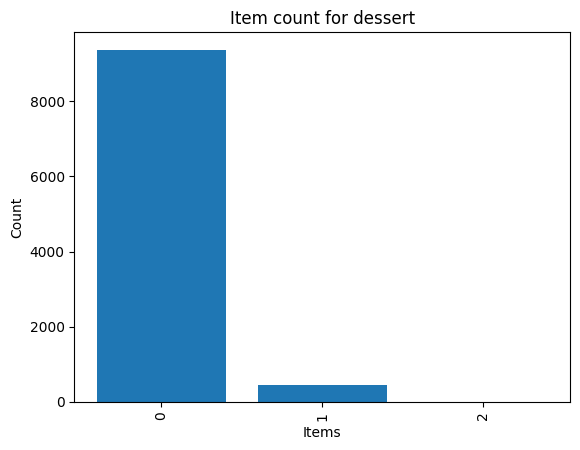

dessert   0    9372
1     455
2       8
Name: dessert, dtype: int64


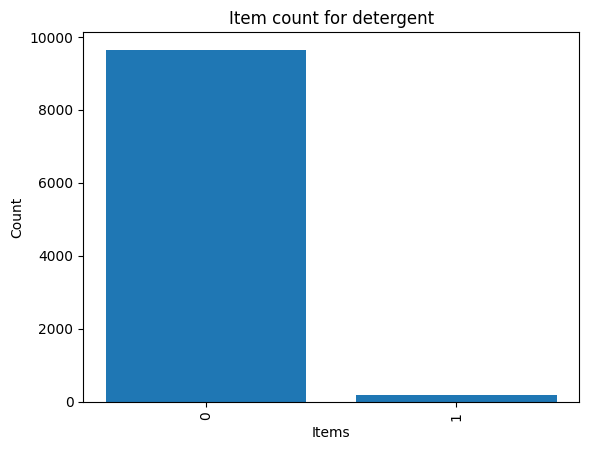

detergent   0    9646
1     189
Name: detergent, dtype: int64


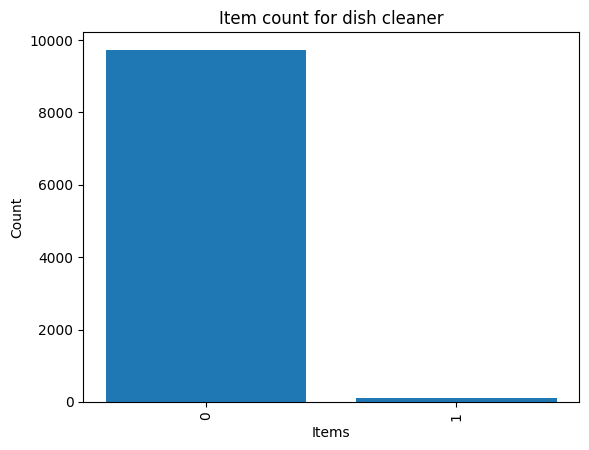

dish cleaner   0    9732
1     103
Name: dish cleaner, dtype: int64


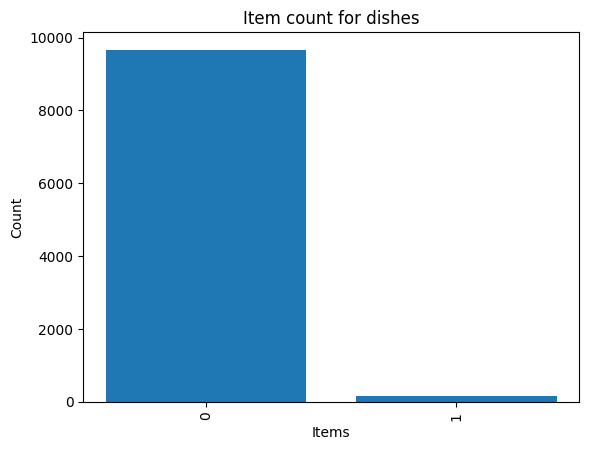

dishes   0    9662
1     173
Name: dishes, dtype: int64


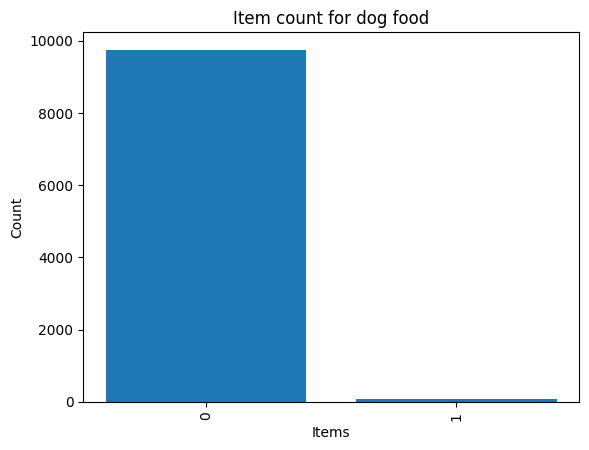

dog food   0    9751
1      84
Name: dog food, dtype: int64


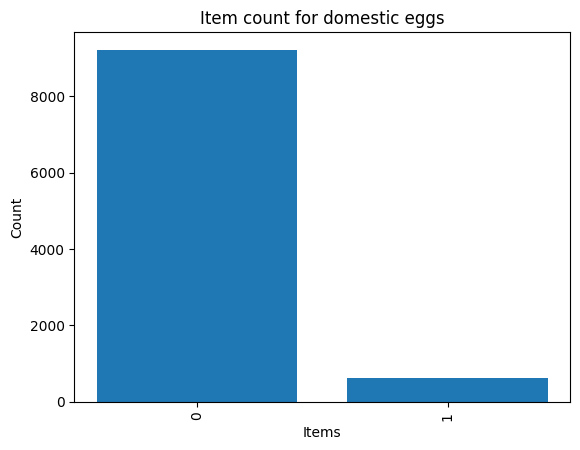

domestic eggs   0    9211
1     624
Name: domestic eggs, dtype: int64


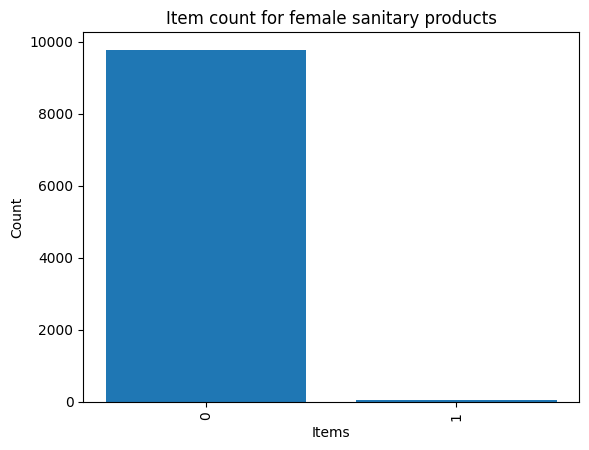

female sanitary products   0    9775
1      60
Name: female sanitary products, dtype: int64


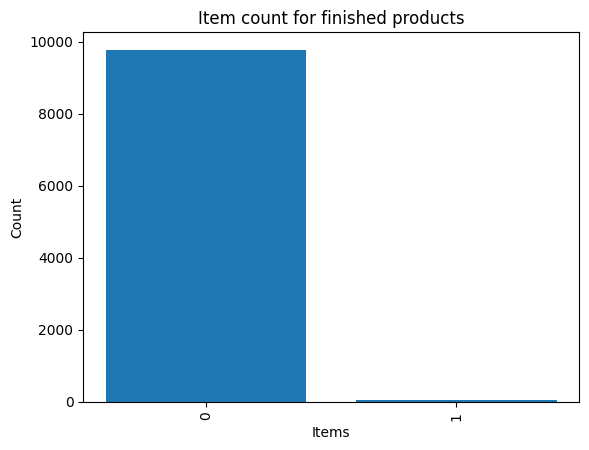

finished products   0    9771
1      64
Name: finished products, dtype: int64


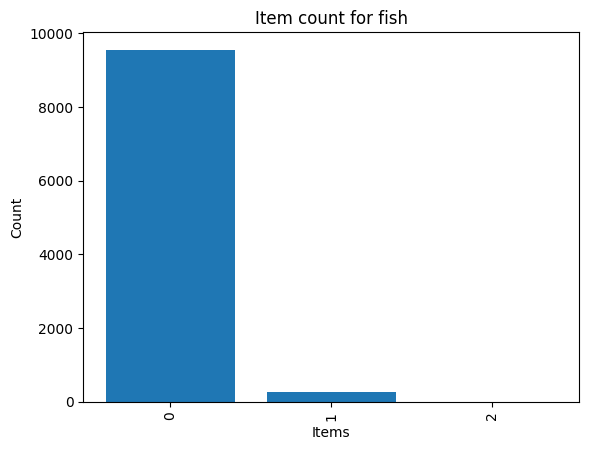

fish   0    9549
1     280
2       6
Name: fish, dtype: int64


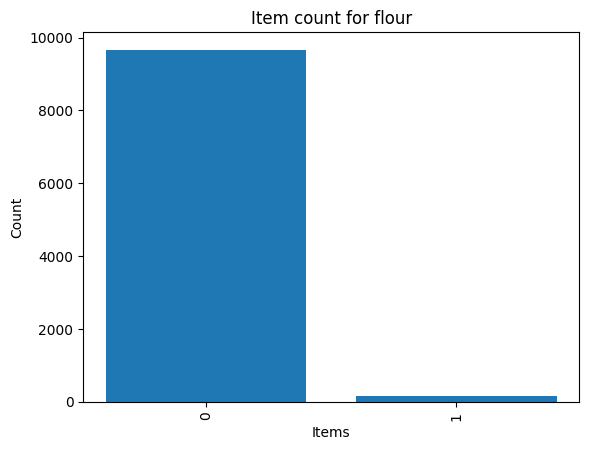

flour   0    9664
1     171
Name: flour, dtype: int64


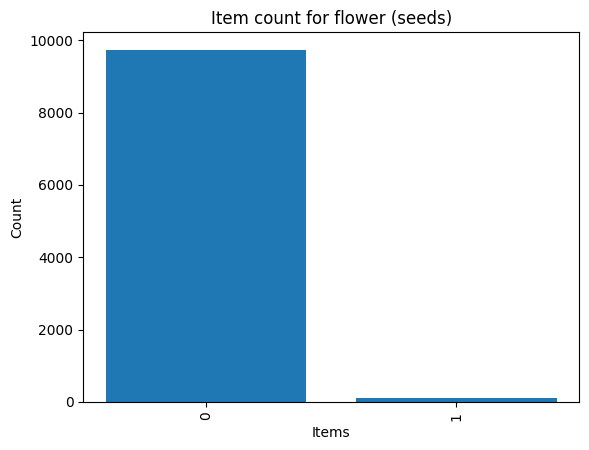

flower (seeds)   0    9733
1     102
Name: flower (seeds), dtype: int64


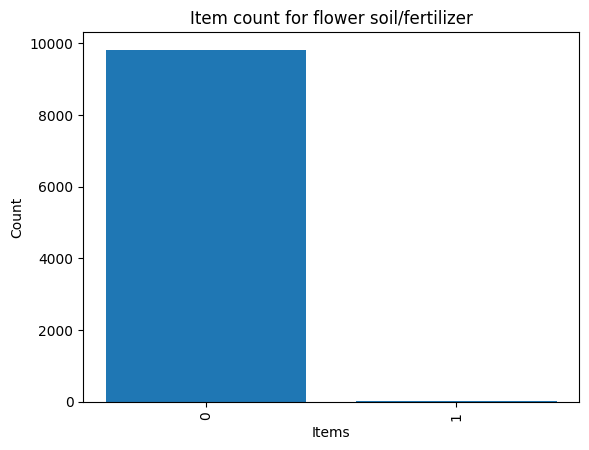

flower soil/fertilizer   0    9816
1      19
Name: flower soil/fertilizer, dtype: int64


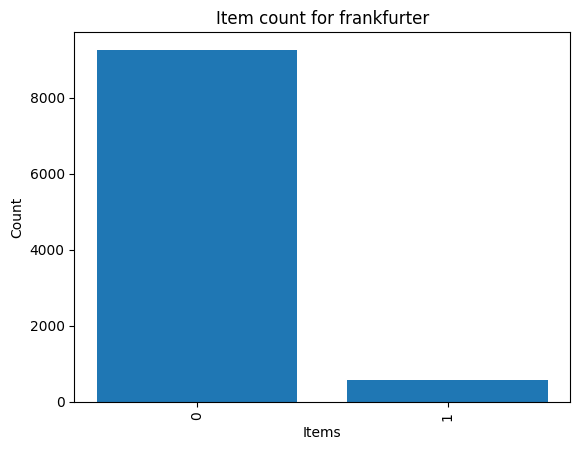

frankfurter   0    9255
1     580
Name: frankfurter, dtype: int64


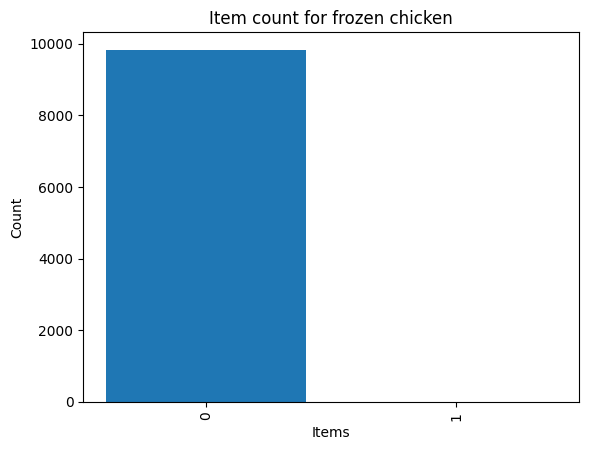

frozen chicken   0    9829
1       6
Name: frozen chicken, dtype: int64


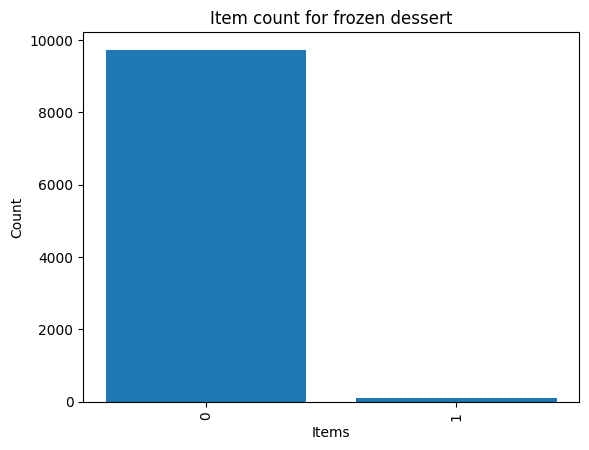

frozen dessert   0    9729
1     106
Name: frozen dessert, dtype: int64


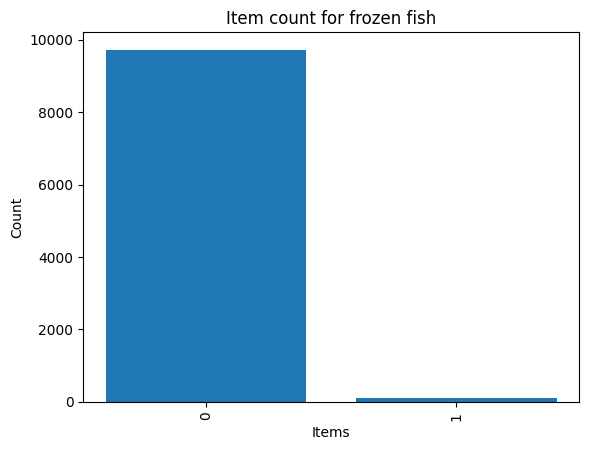

frozen fish   0    9720
1     115
Name: frozen fish, dtype: int64


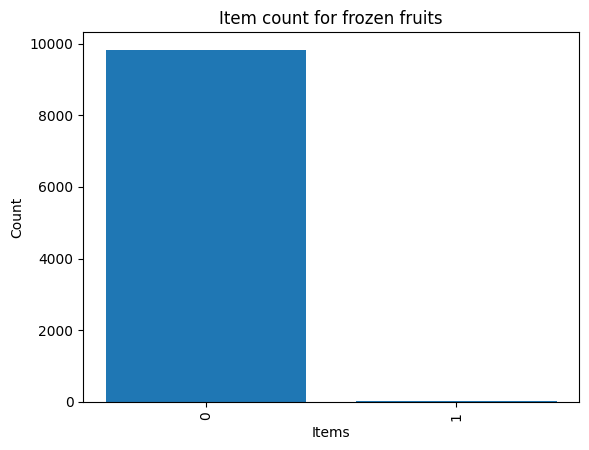

frozen fruits   0    9823
1      12
Name: frozen fruits, dtype: int64


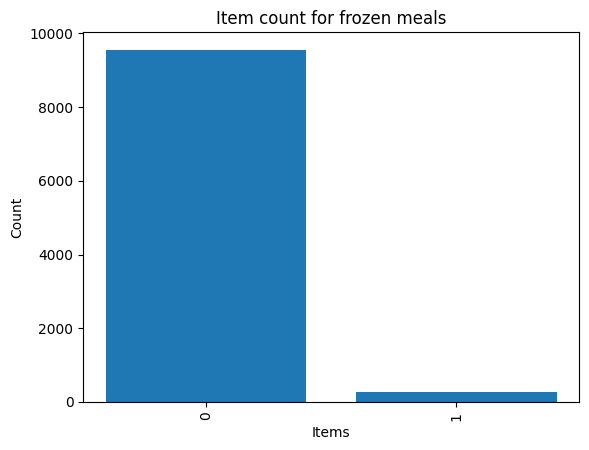

frozen meals   0    9556
1     279
Name: frozen meals, dtype: int64


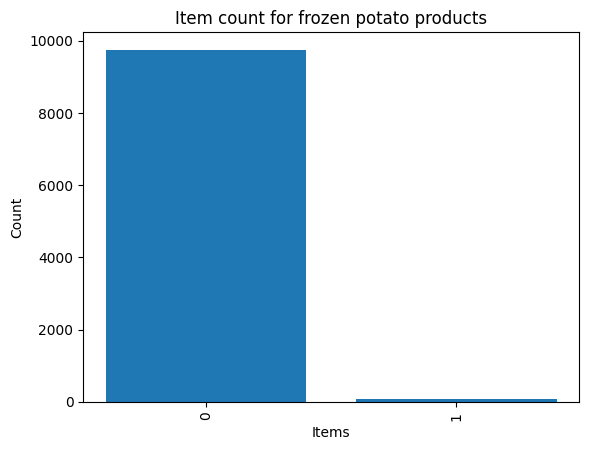

frozen potato products   0    9752
1      83
Name: frozen potato products, dtype: int64


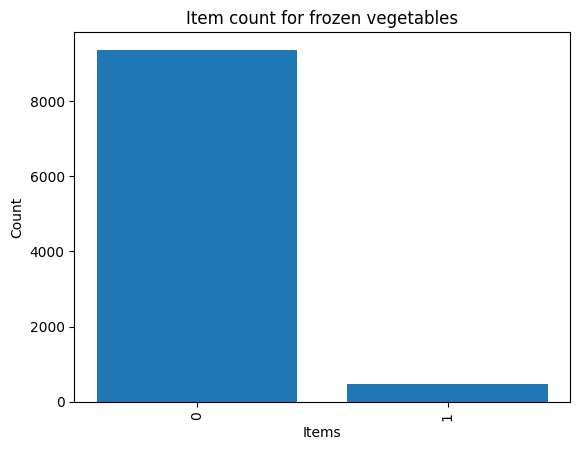

frozen vegetables   0    9362
1     473
Name: frozen vegetables, dtype: int64


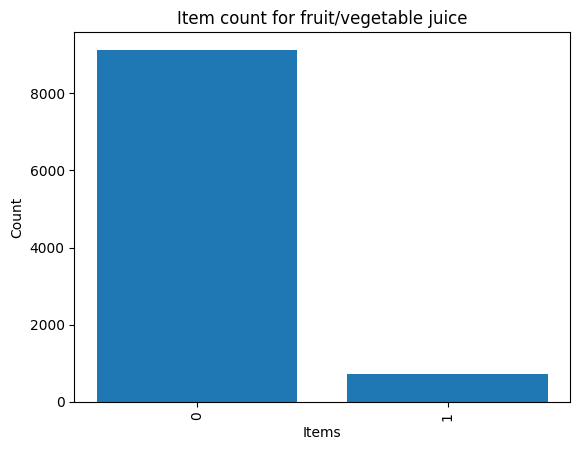

fruit/vegetable juice   0    9124
1     711
Name: fruit/vegetable juice, dtype: int64


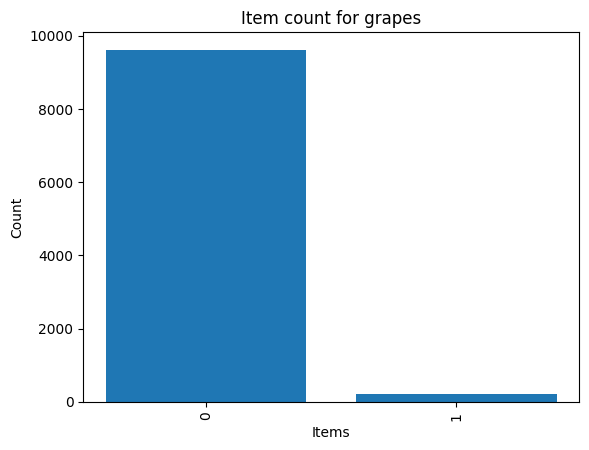

grapes   0    9615
1     220
Name: grapes, dtype: int64


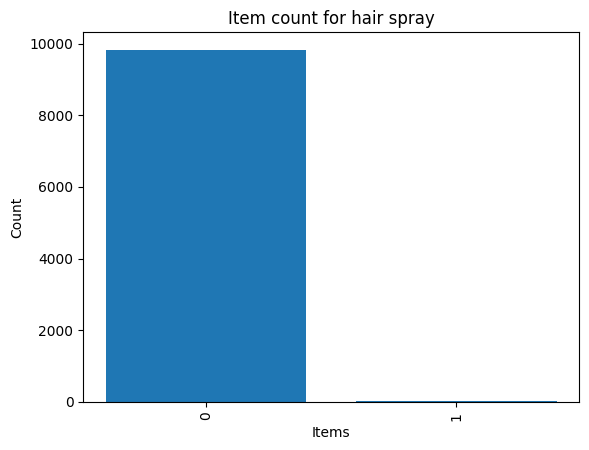

hair spray   0    9824
1      11
Name: hair spray, dtype: int64


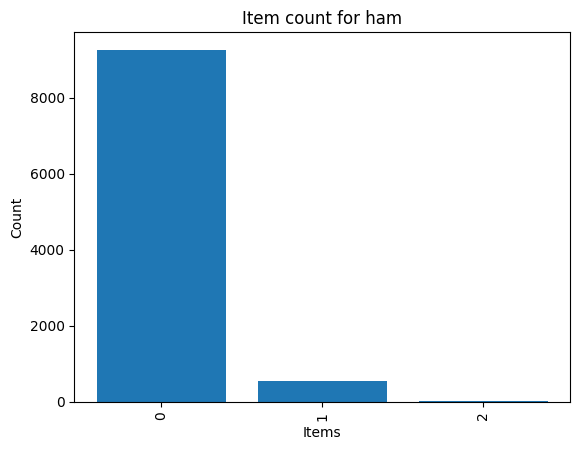

ham   0    9264
1     559
2      12
Name: ham, dtype: int64


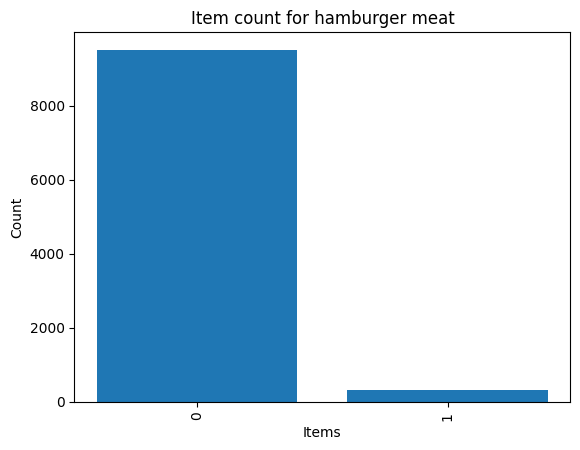

hamburger meat   0    9508
1     327
Name: hamburger meat, dtype: int64


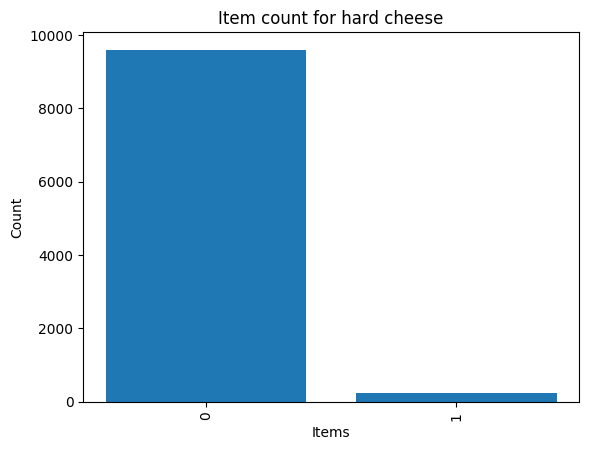

hard cheese   0    9594
1     241
Name: hard cheese, dtype: int64


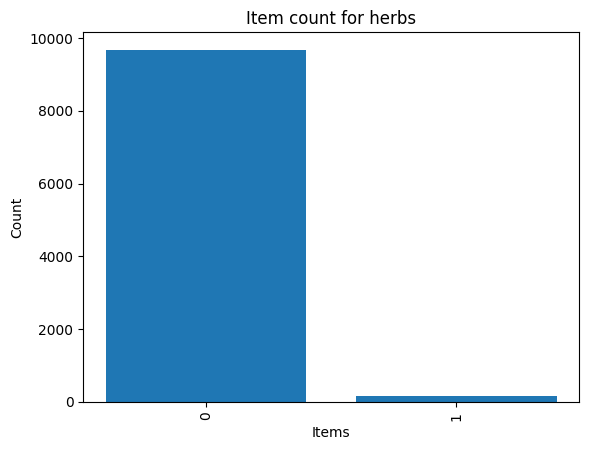

herbs   0    9675
1     160
Name: herbs, dtype: int64


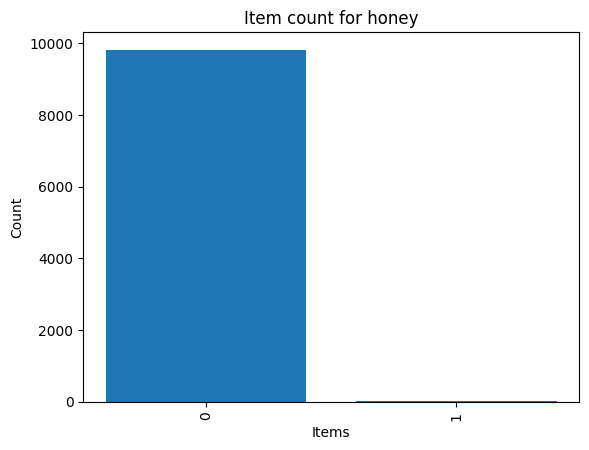

honey   0    9820
1      15
Name: honey, dtype: int64


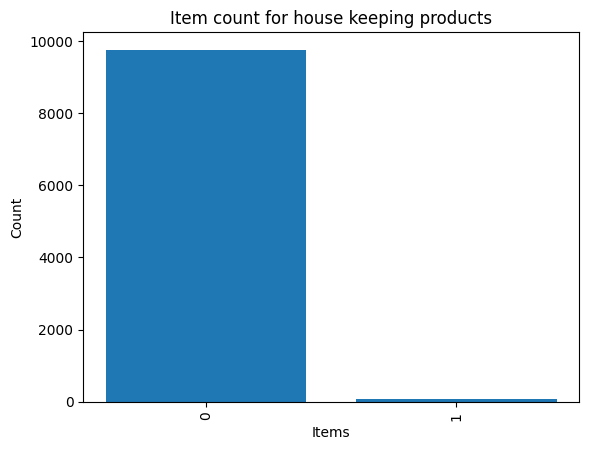

house keeping products   0    9753
1      82
Name: house keeping products, dtype: int64


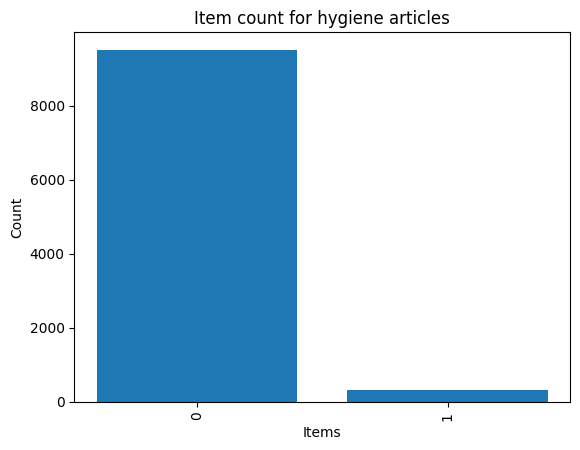

hygiene articles   0    9511
1     324
Name: hygiene articles, dtype: int64


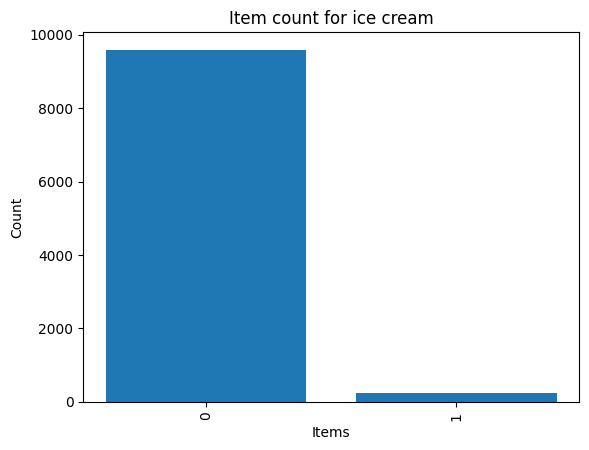

ice cream   0    9589
1     246
Name: ice cream, dtype: int64


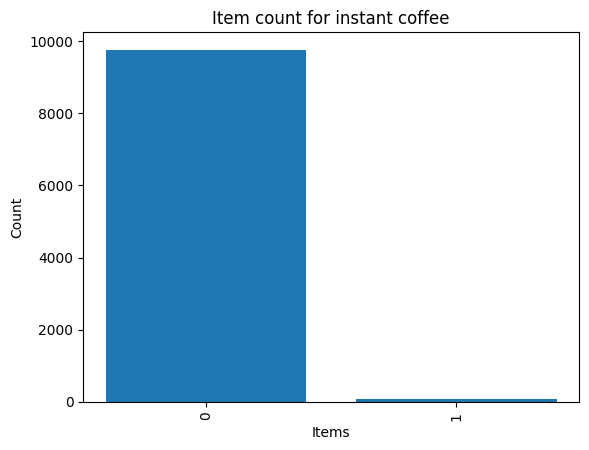

instant coffee   0    9762
1      73
Name: instant coffee, dtype: int64


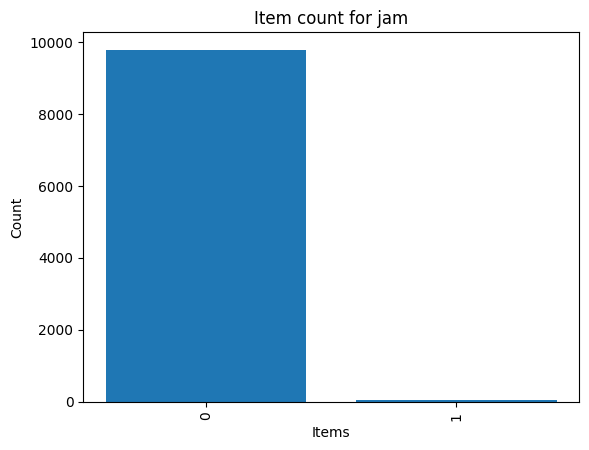

jam   0    9782
1      53
Name: jam, dtype: int64


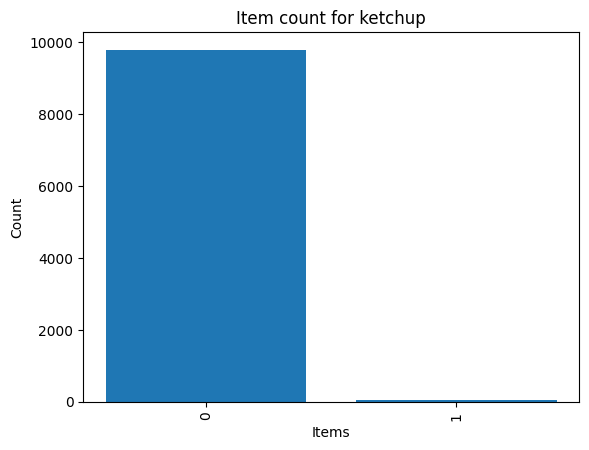

ketchup   0    9793
1      42
Name: ketchup, dtype: int64


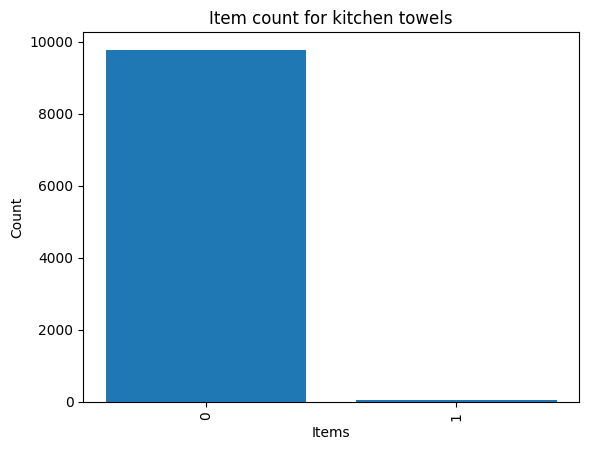

kitchen towels   0    9776
1      59
Name: kitchen towels, dtype: int64


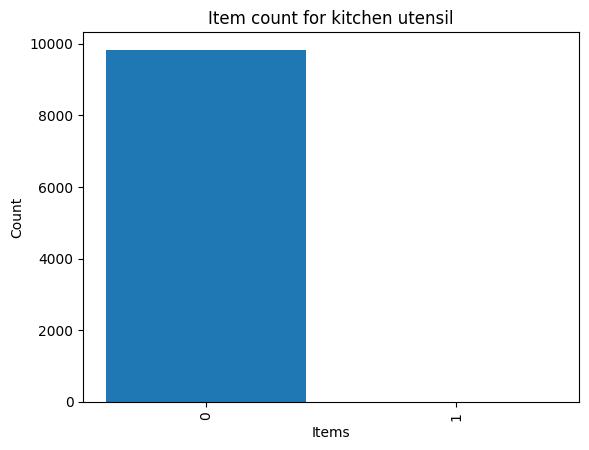

kitchen utensil   0    9831
1       4
Name: kitchen utensil, dtype: int64


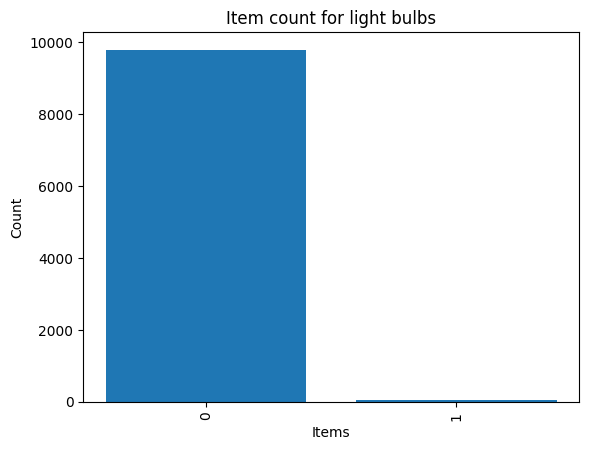

light bulbs   0    9794
1      41
Name: light bulbs, dtype: int64


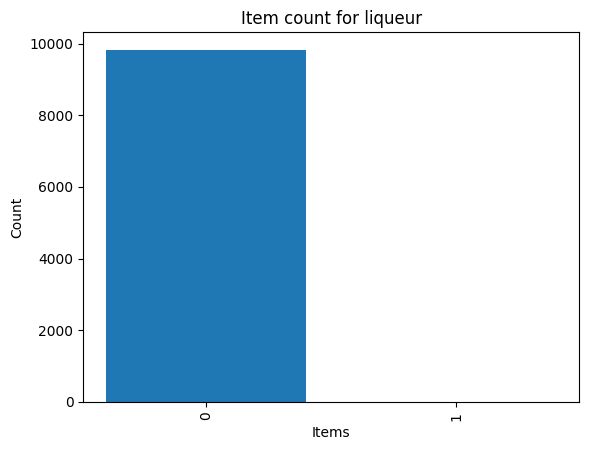

liqueur   0    9826
1       9
Name: liqueur, dtype: int64


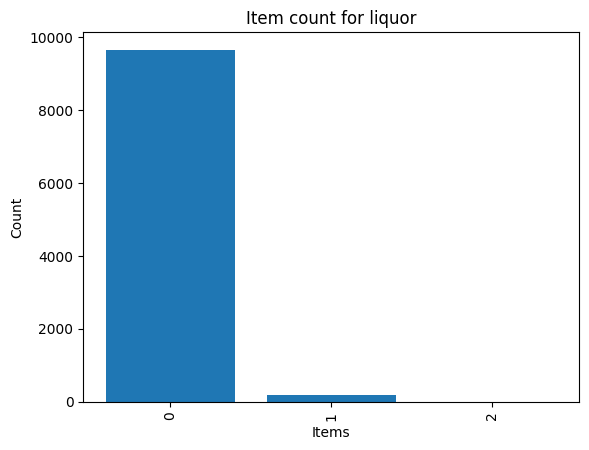

liquor   0    9651
1     181
2       3
Name: liquor, dtype: int64


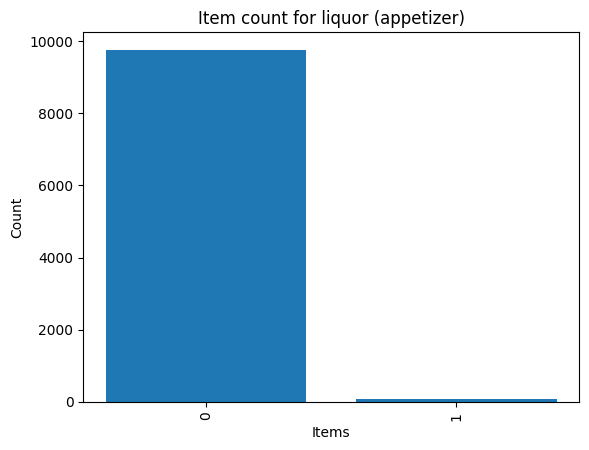

liquor (appetizer)   0    9757
1      78
Name: liquor (appetizer), dtype: int64


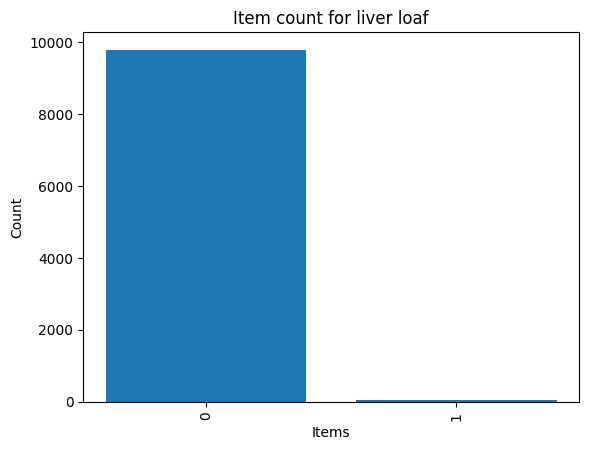

liver loaf   0    9785
1      50
Name: liver loaf, dtype: int64


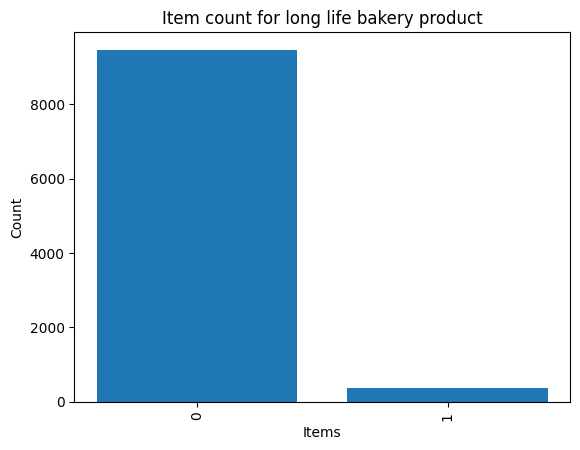

long life bakery product   0    9467
1     368
Name: long life bakery product, dtype: int64


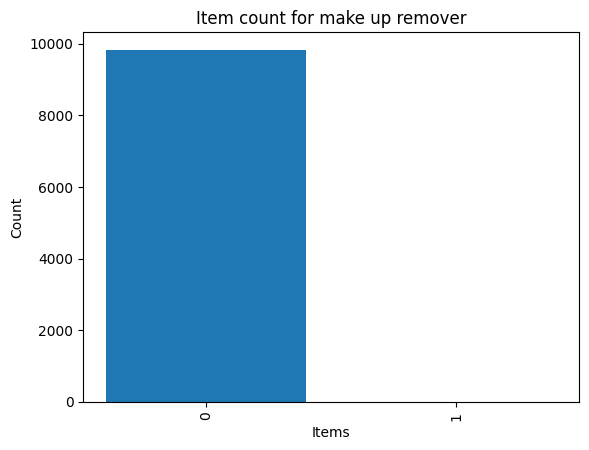

make up remover   0    9827
1       8
Name: make up remover, dtype: int64


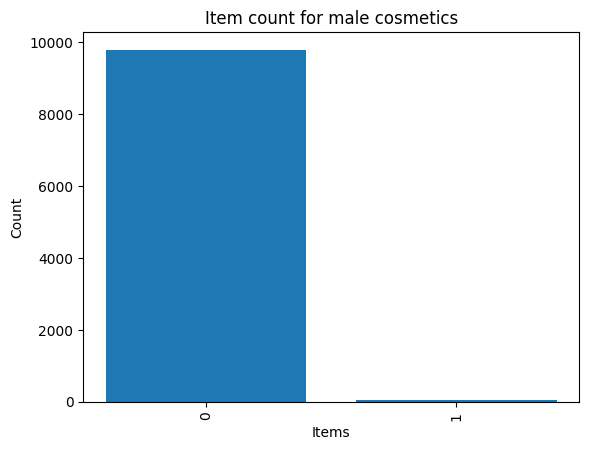

male cosmetics   0    9790
1      45
Name: male cosmetics, dtype: int64


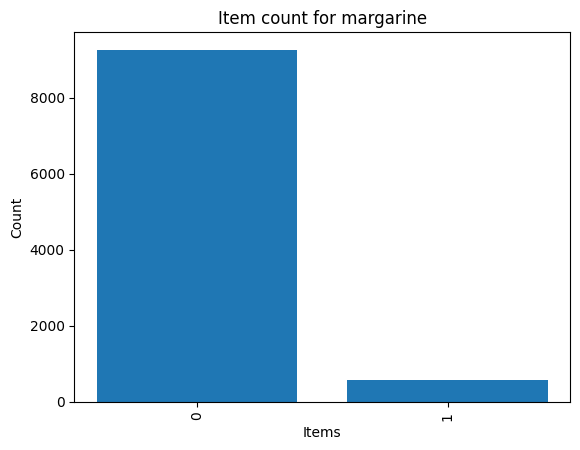

margarine   0    9259
1     576
Name: margarine, dtype: int64


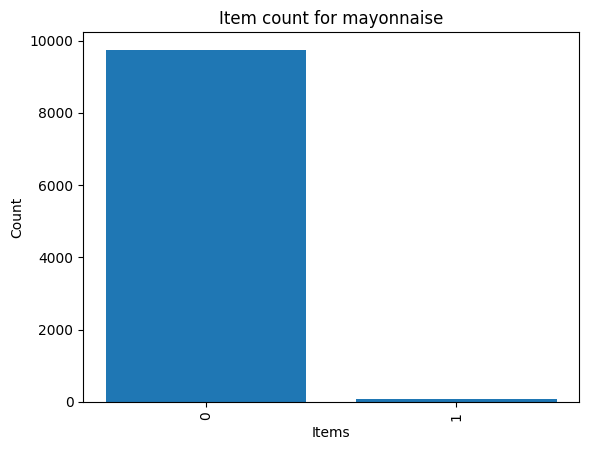

mayonnaise   0    9745
1      90
Name: mayonnaise, dtype: int64


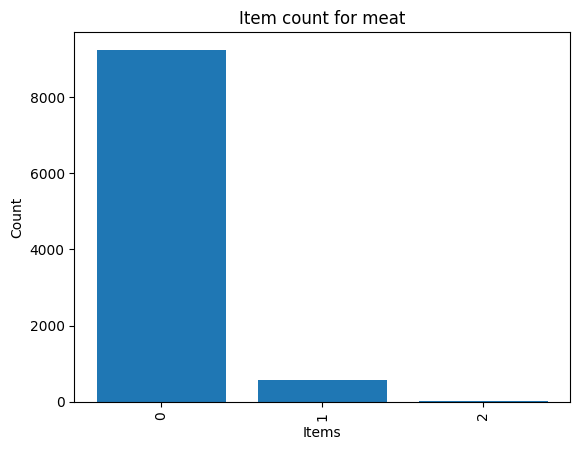

meat   0    9240
1     567
2      28
Name: meat, dtype: int64


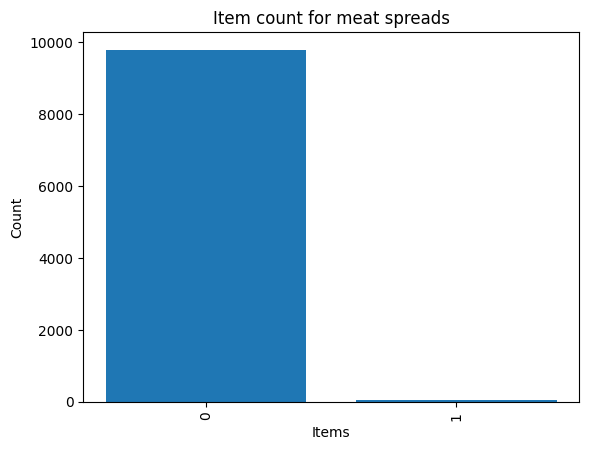

meat spreads   0    9793
1      42
Name: meat spreads, dtype: int64


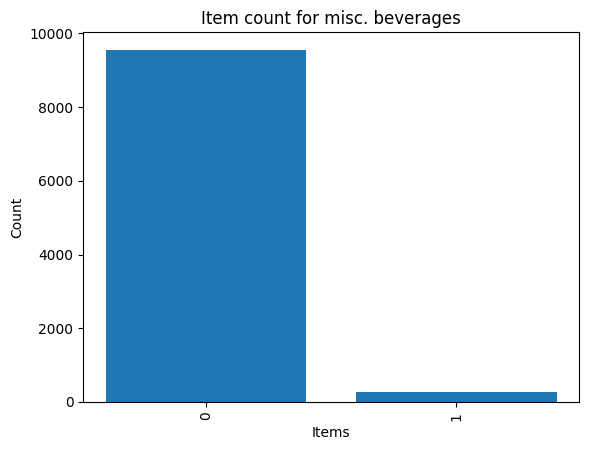

misc. beverages   0    9556
1     279
Name: misc. beverages, dtype: int64


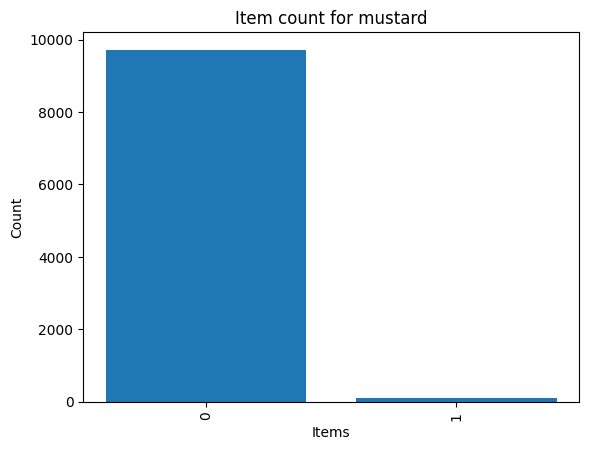

mustard   0    9717
1     118
Name: mustard, dtype: int64


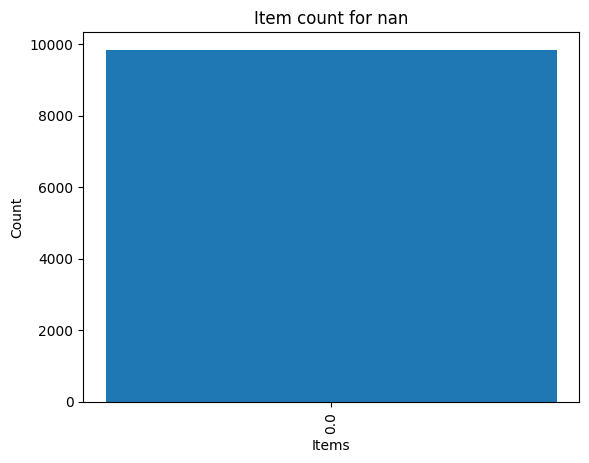

nan   0.0    9835
Name: nan, dtype: int64


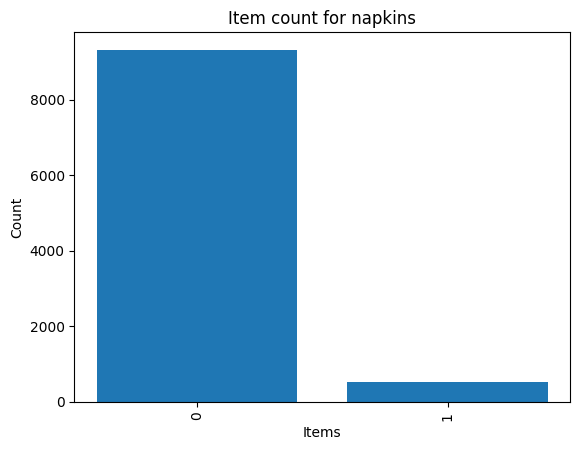

napkins   0    9320
1     515
Name: napkins, dtype: int64


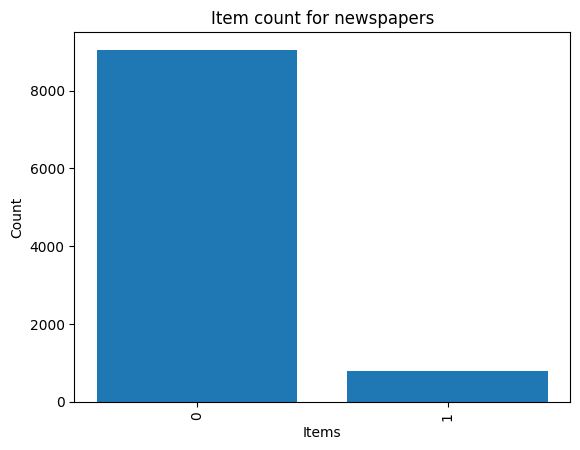

newspapers   0    9050
1     785
Name: newspapers, dtype: int64


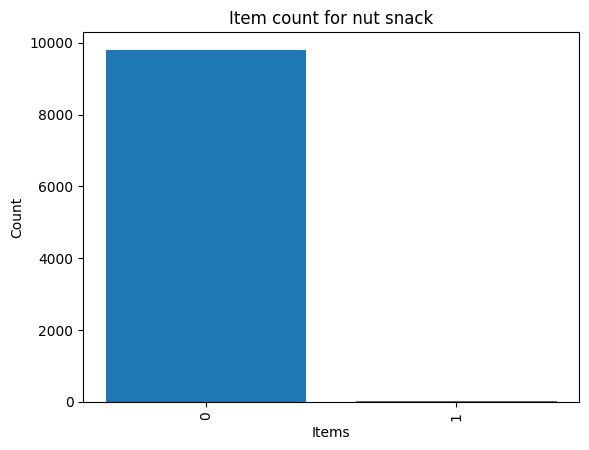

nut snack   0    9804
1      31
Name: nut snack, dtype: int64


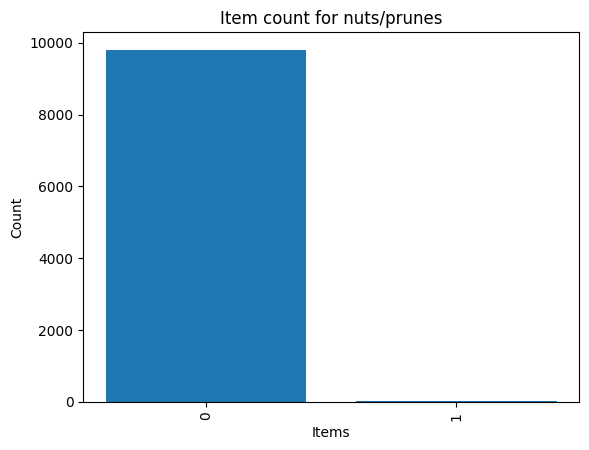

nuts/prunes   0    9802
1      33
Name: nuts/prunes, dtype: int64


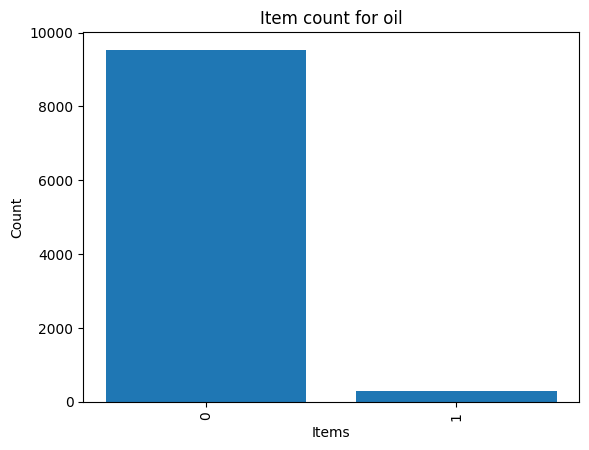

oil   0    9533
1     302
Name: oil, dtype: int64


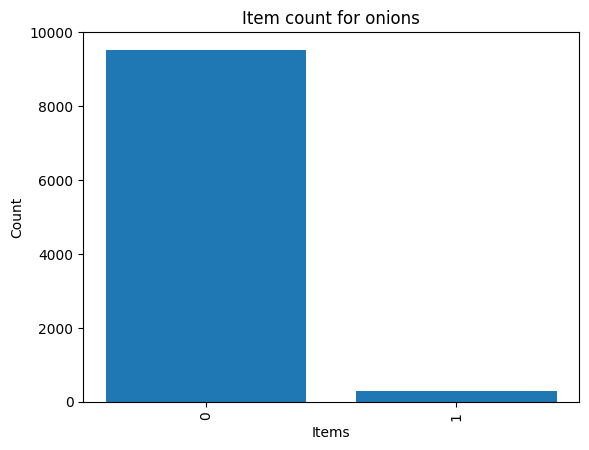

onions   0    9530
1     305
Name: onions, dtype: int64


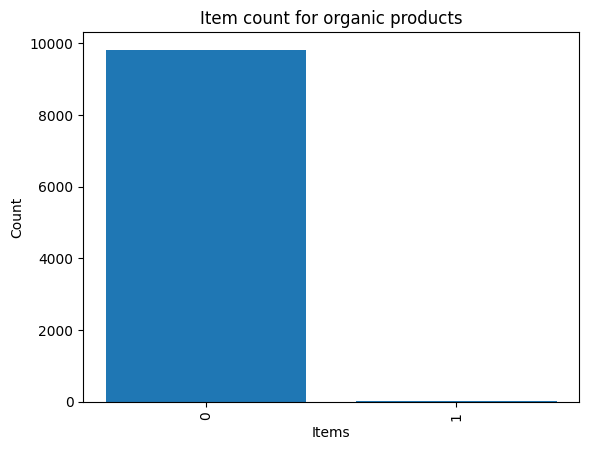

organic products   0    9819
1      16
Name: organic products, dtype: int64


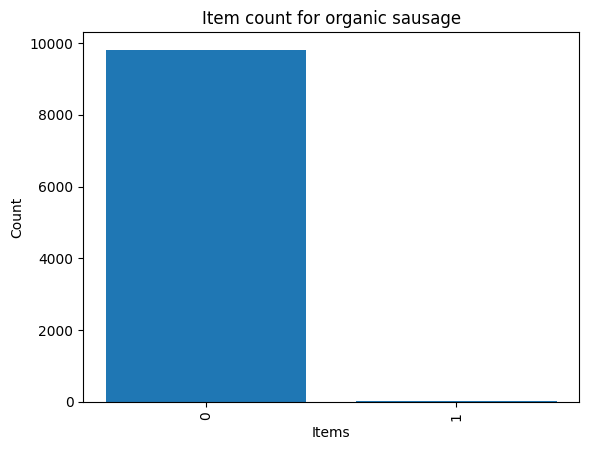

organic sausage   0    9813
1      22
Name: organic sausage, dtype: int64


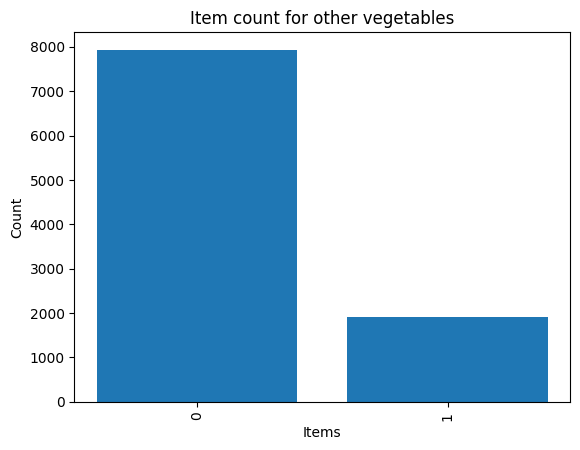

other vegetables   0    7932
1    1903
Name: other vegetables, dtype: int64


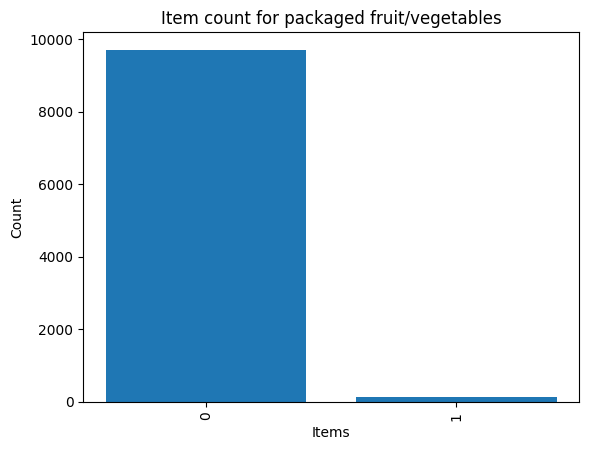

packaged fruit/vegetables   0    9707
1     128
Name: packaged fruit/vegetables, dtype: int64


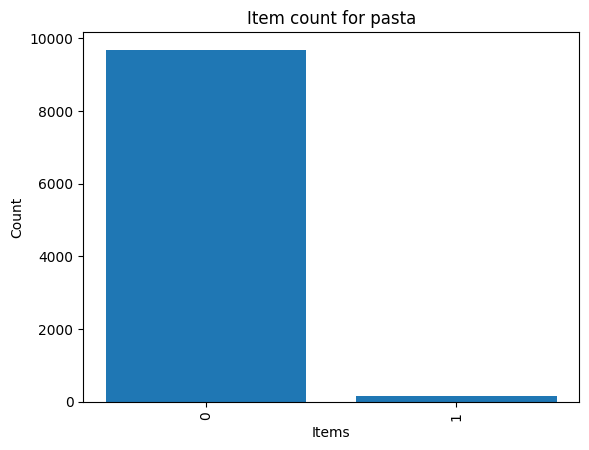

pasta   0    9687
1     148
Name: pasta, dtype: int64


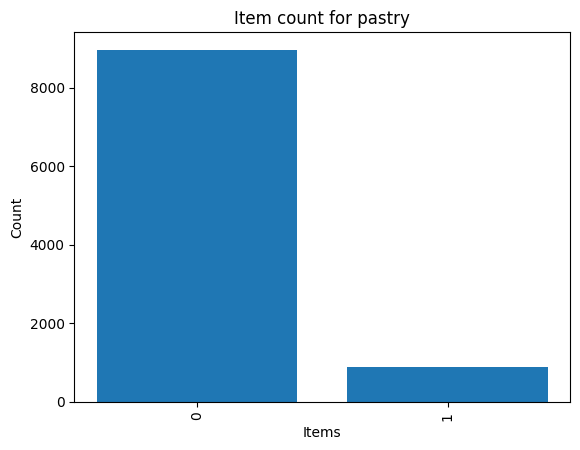

pastry   0    8960
1     875
Name: pastry, dtype: int64


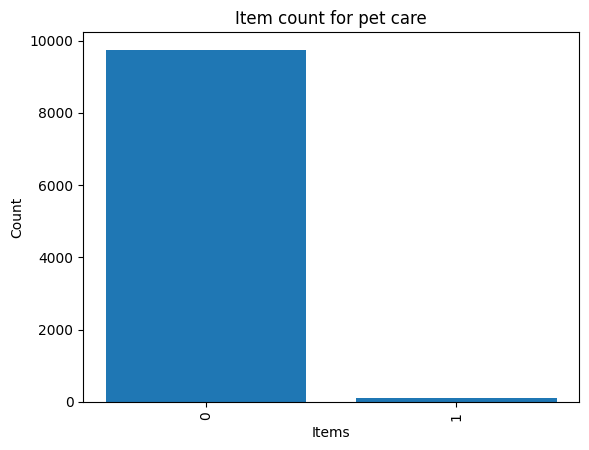

pet care   0    9742
1      93
Name: pet care, dtype: int64


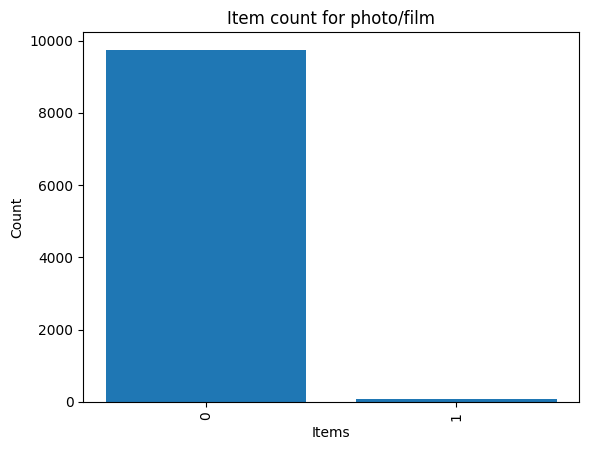

photo/film   0    9744
1      91
Name: photo/film, dtype: int64


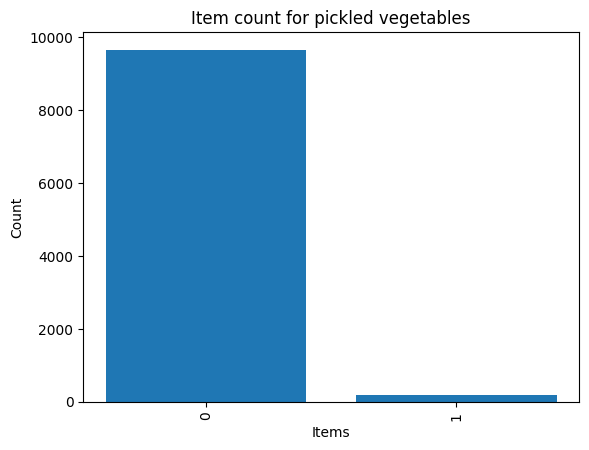

pickled vegetables   0    9659
1     176
Name: pickled vegetables, dtype: int64


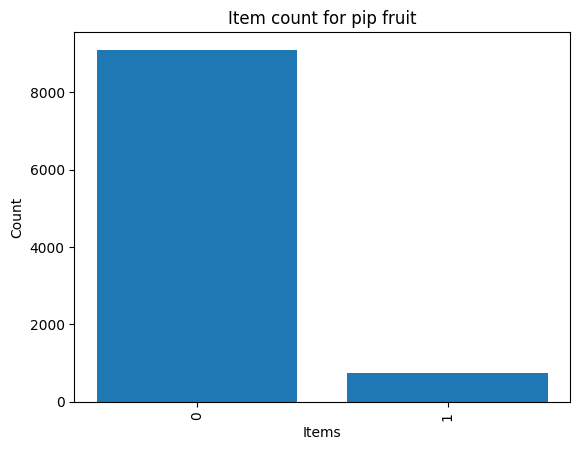

pip fruit   0    9091
1     744
Name: pip fruit, dtype: int64


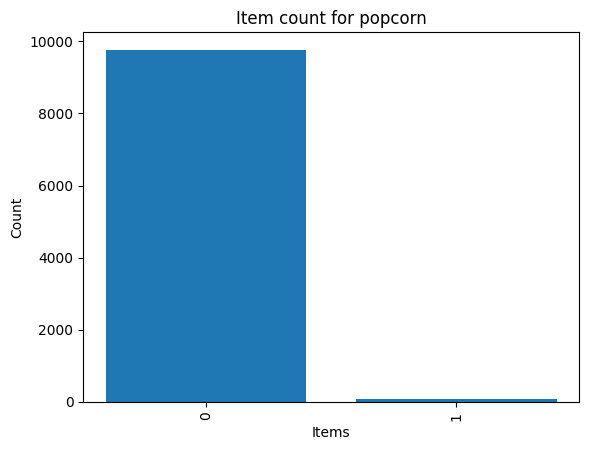

popcorn   0    9764
1      71
Name: popcorn, dtype: int64


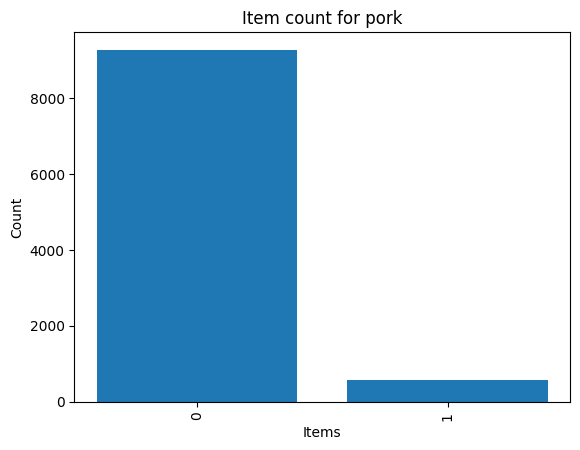

pork   0    9268
1     567
Name: pork, dtype: int64


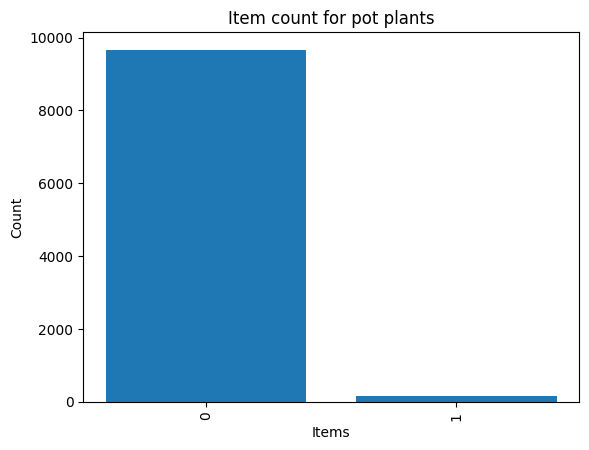

pot plants   0    9665
1     170
Name: pot plants, dtype: int64


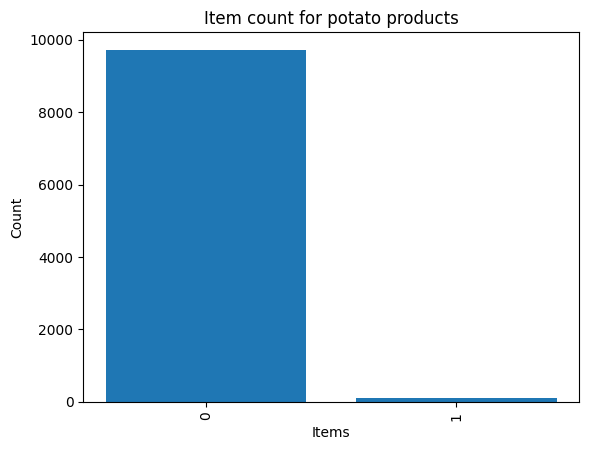

potato products   0    9724
1     111
Name: potato products, dtype: int64


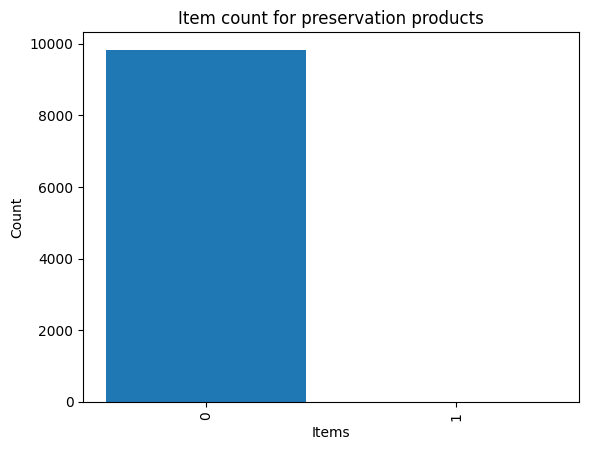

preservation products   0    9833
1       2
Name: preservation products, dtype: int64


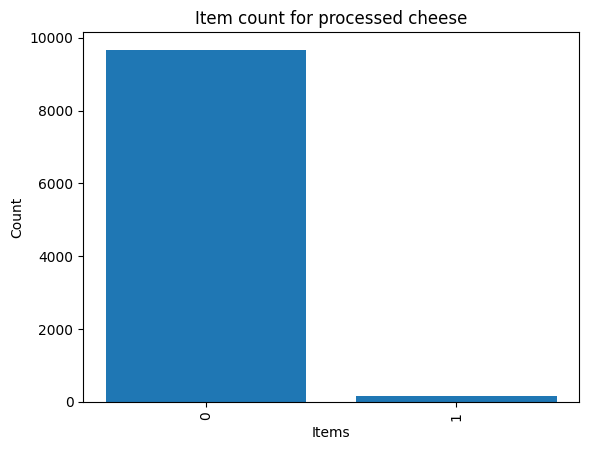

processed cheese   0    9672
1     163
Name: processed cheese, dtype: int64


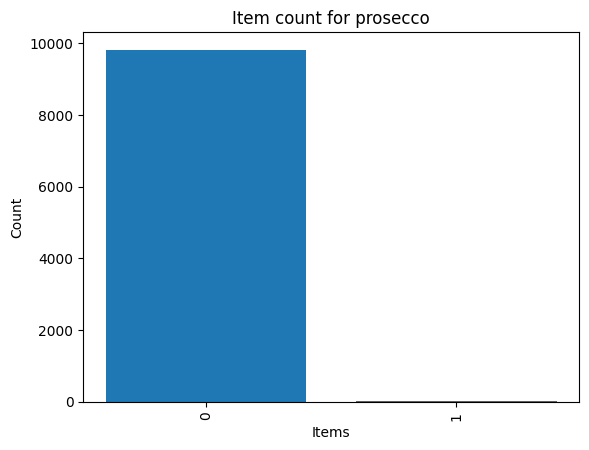

prosecco   0    9815
1      20
Name: prosecco, dtype: int64


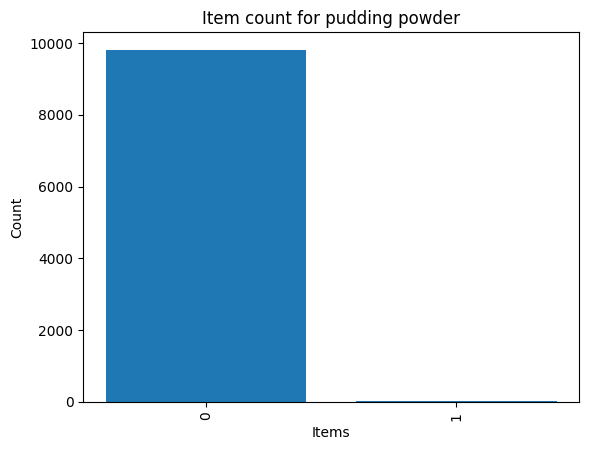

pudding powder   0    9812
1      23
Name: pudding powder, dtype: int64


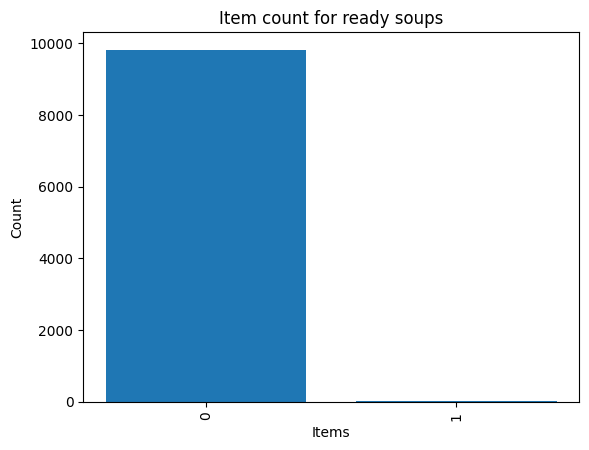

ready soups   0    9817
1      18
Name: ready soups, dtype: int64


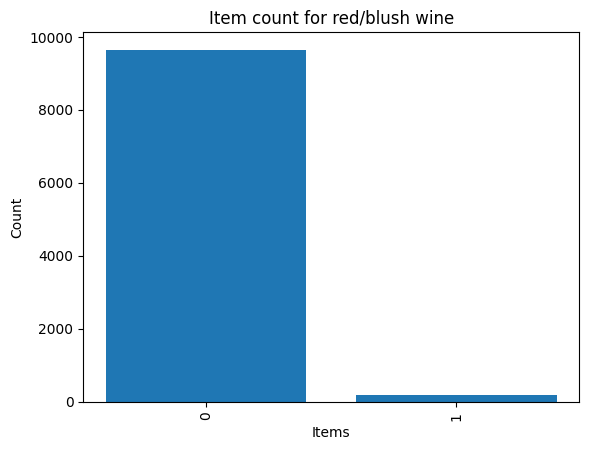

red/blush wine   0    9646
1     189
Name: red/blush wine, dtype: int64


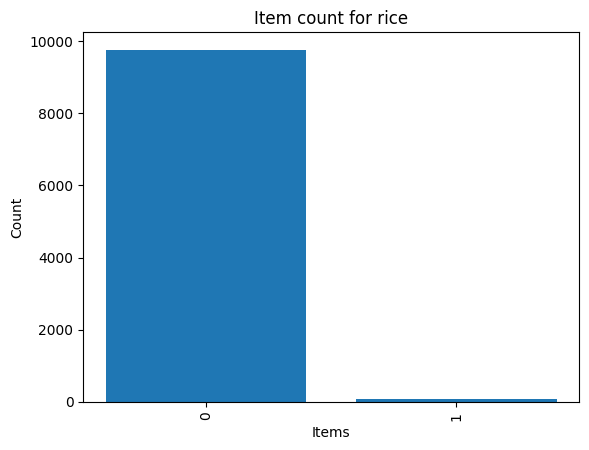

rice   0    9760
1      75
Name: rice, dtype: int64


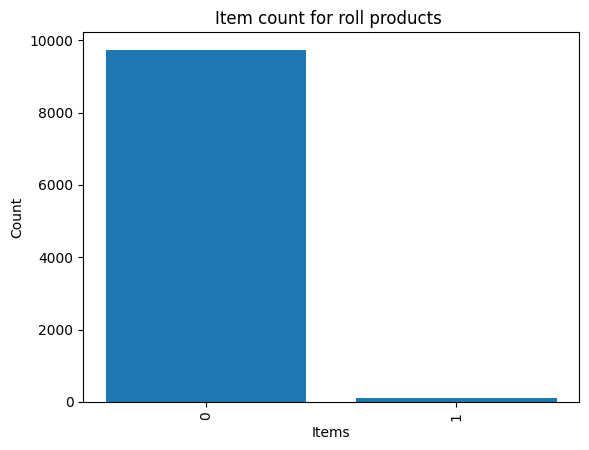

roll products    0    9734
1     101
Name: roll products , dtype: int64


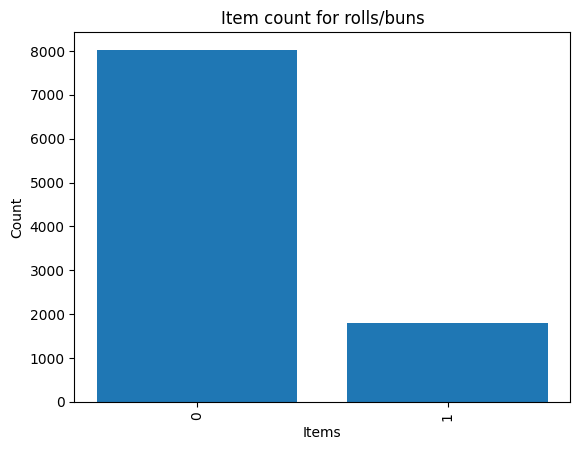

rolls/buns   0    8026
1    1809
Name: rolls/buns, dtype: int64


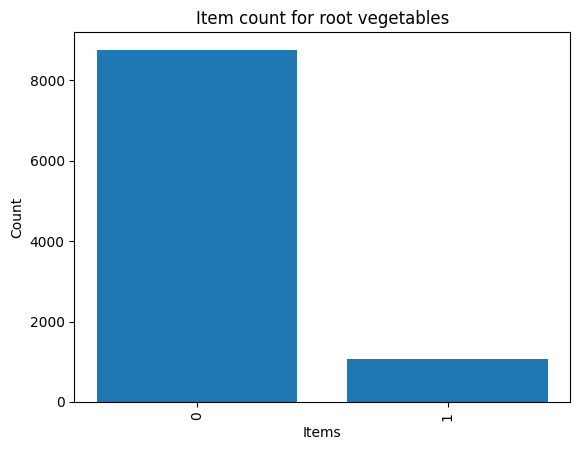

root vegetables   0    8763
1    1072
Name: root vegetables, dtype: int64


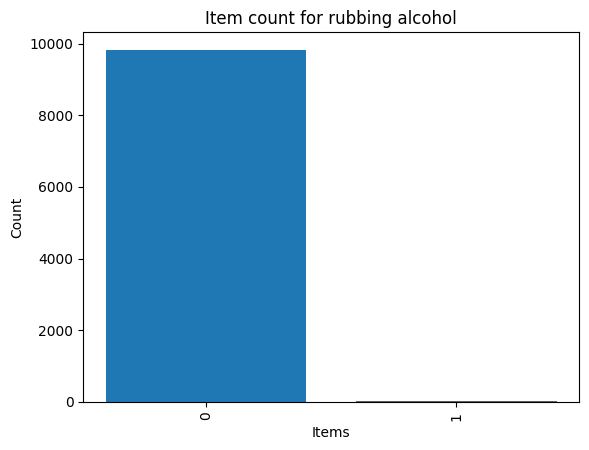

rubbing alcohol   0    9825
1      10
Name: rubbing alcohol, dtype: int64


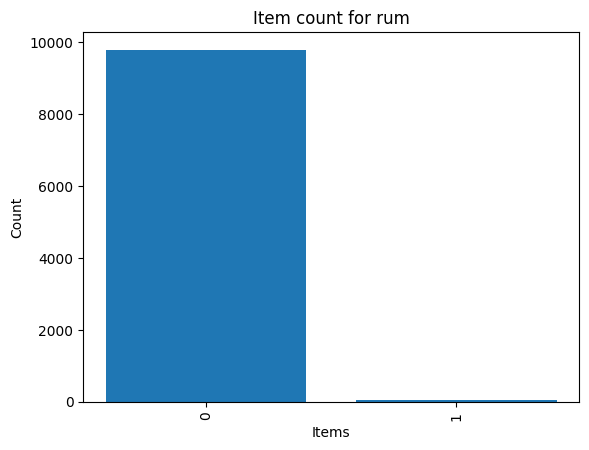

rum   0    9791
1      44
Name: rum, dtype: int64


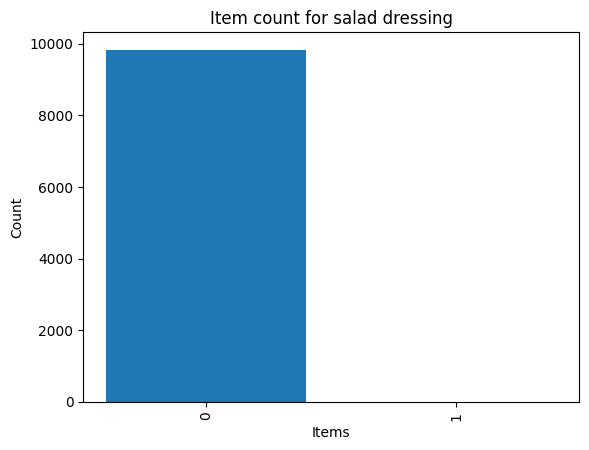

salad dressing   0    9827
1       8
Name: salad dressing, dtype: int64


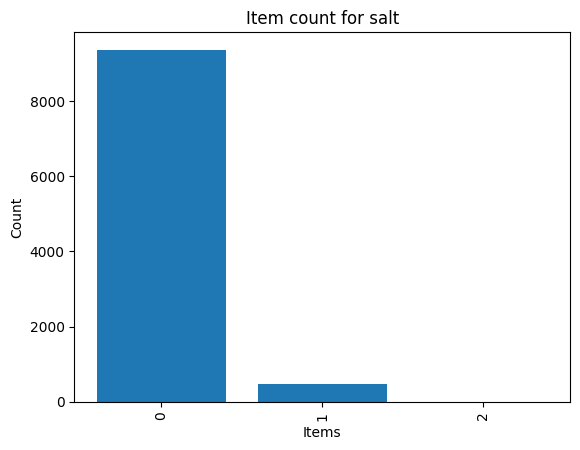

salt   0    9364
1     464
2       7
Name: salt, dtype: int64


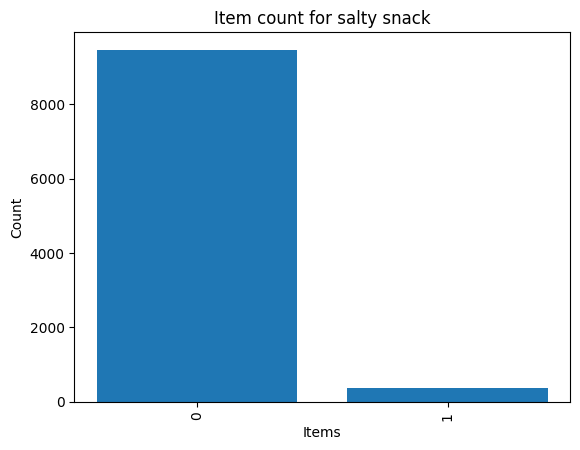

salty snack   0    9463
1     372
Name: salty snack, dtype: int64


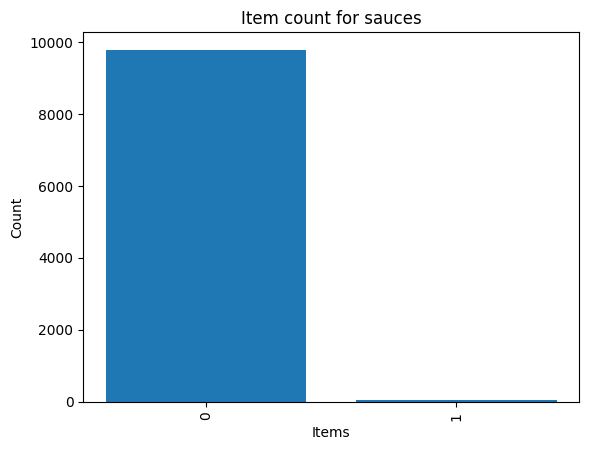

sauces   0    9781
1      54
Name: sauces, dtype: int64


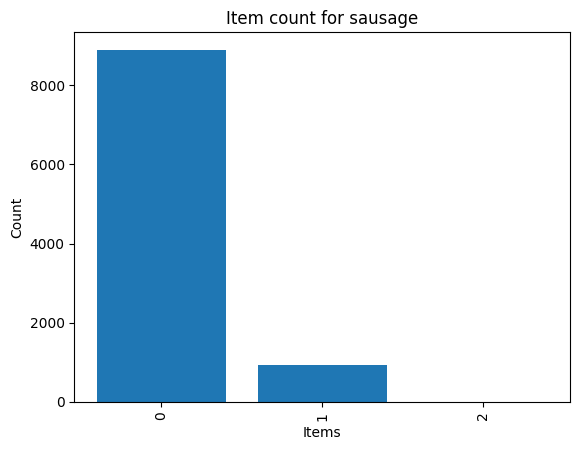

sausage   0    8894
1     936
2       5
Name: sausage, dtype: int64


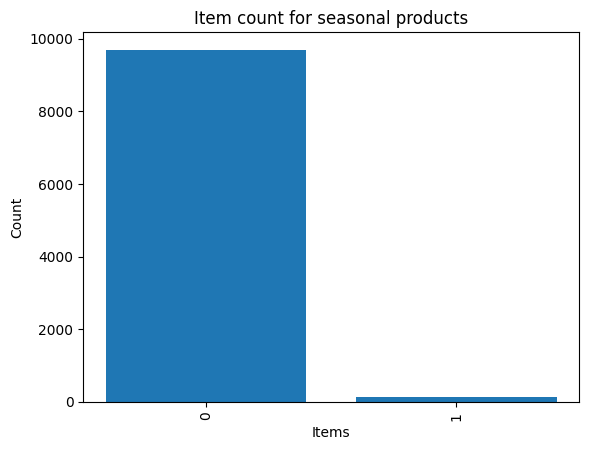

seasonal products   0    9695
1     140
Name: seasonal products, dtype: int64


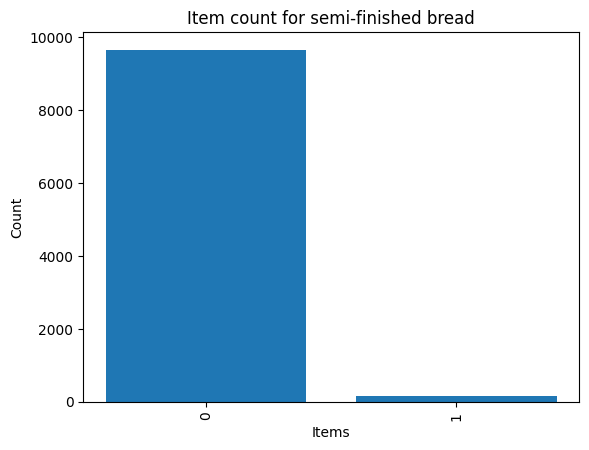

semi-finished bread   0    9661
1     174
Name: semi-finished bread, dtype: int64


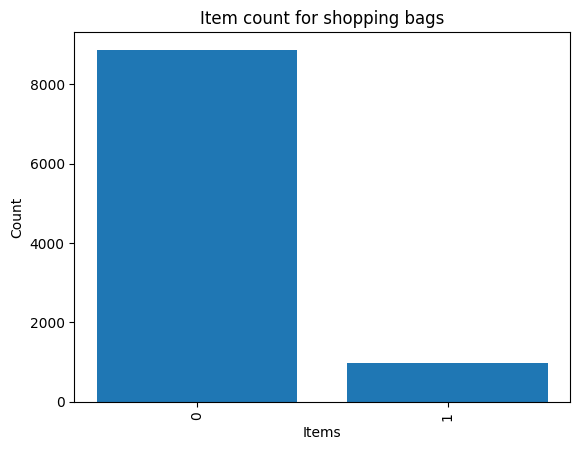

shopping bags   0    8866
1     969
Name: shopping bags, dtype: int64


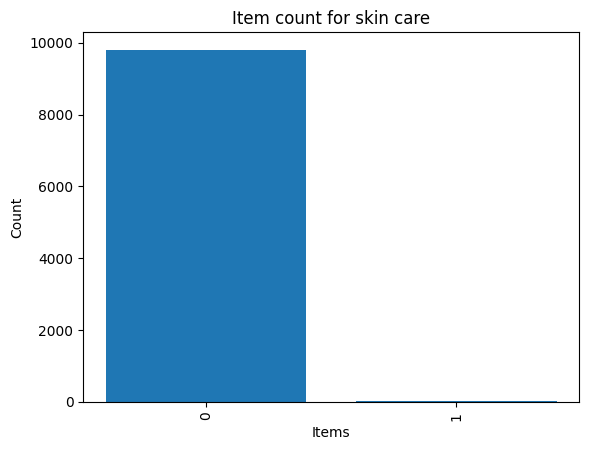

skin care   0    9800
1      35
Name: skin care, dtype: int64


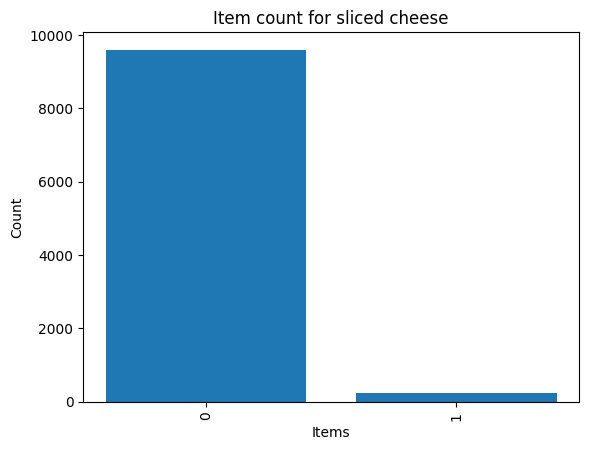

sliced cheese   0    9594
1     241
Name: sliced cheese, dtype: int64


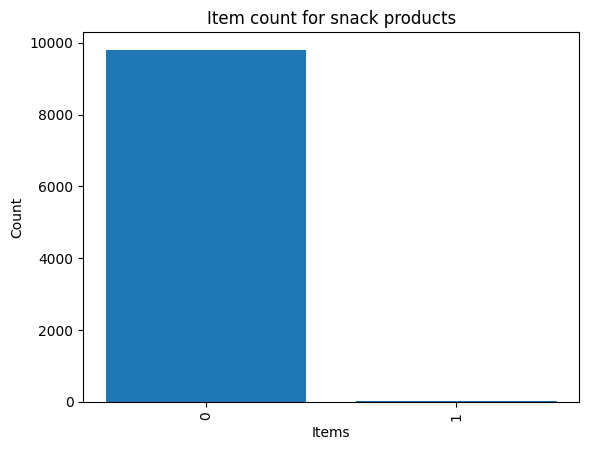

snack products   0    9805
1      30
Name: snack products, dtype: int64


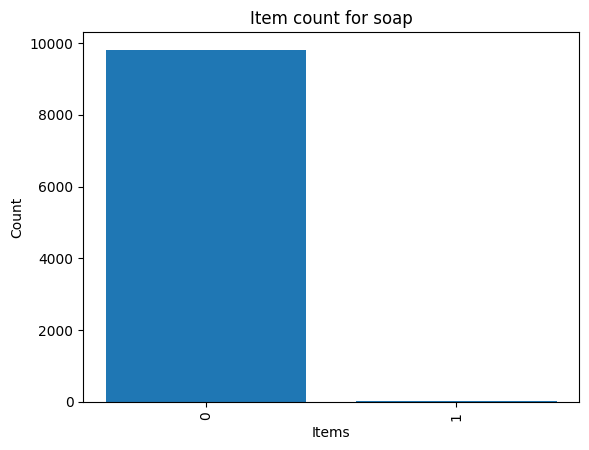

soap   0    9809
1      26
Name: soap, dtype: int64


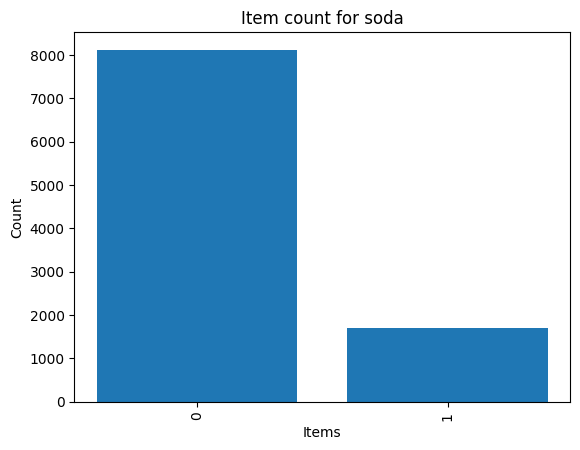

soda   0    8120
1    1715
Name: soda, dtype: int64


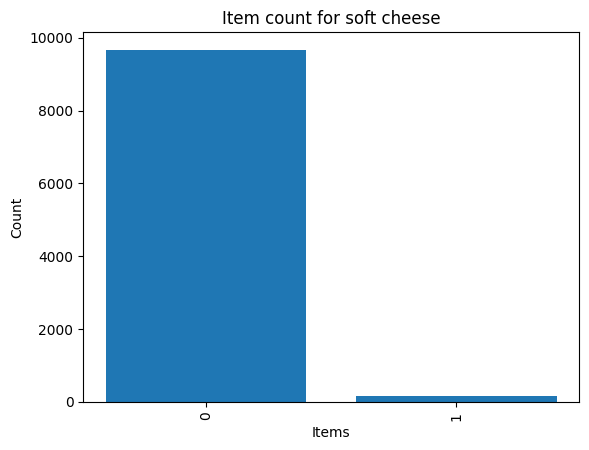

soft cheese   0    9667
1     168
Name: soft cheese, dtype: int64


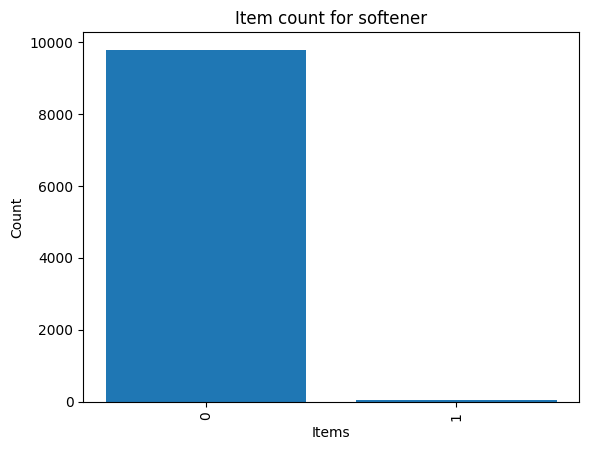

softener   0    9781
1      54
Name: softener, dtype: int64


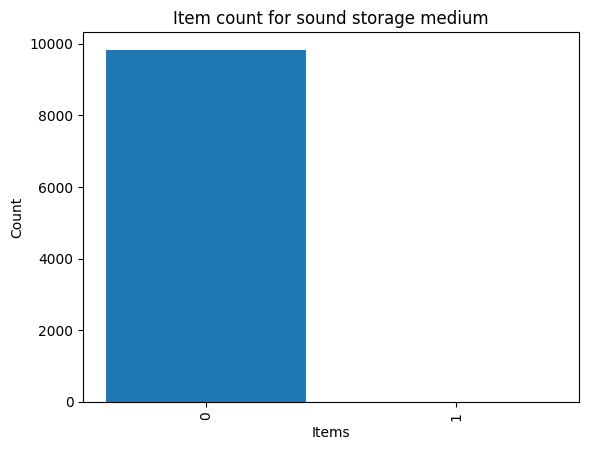

sound storage medium   0    9834
1       1
Name: sound storage medium, dtype: int64


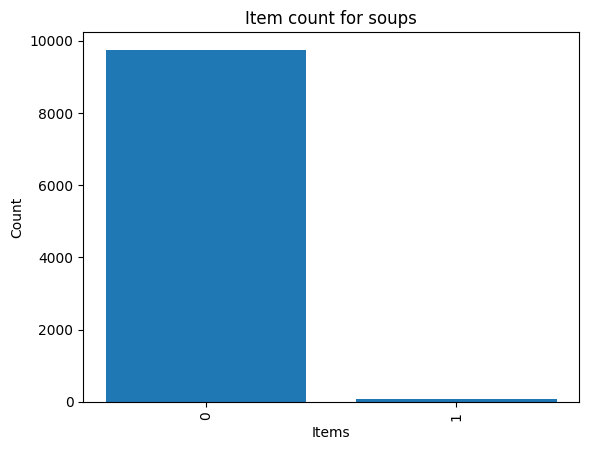

soups   0    9750
1      85
Name: soups, dtype: int64


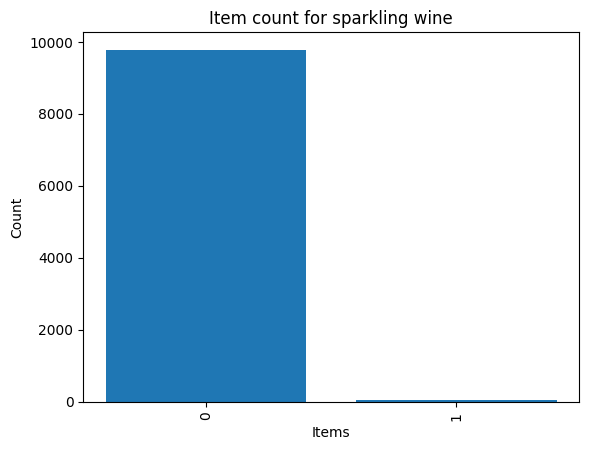

sparkling wine   0    9780
1      55
Name: sparkling wine, dtype: int64


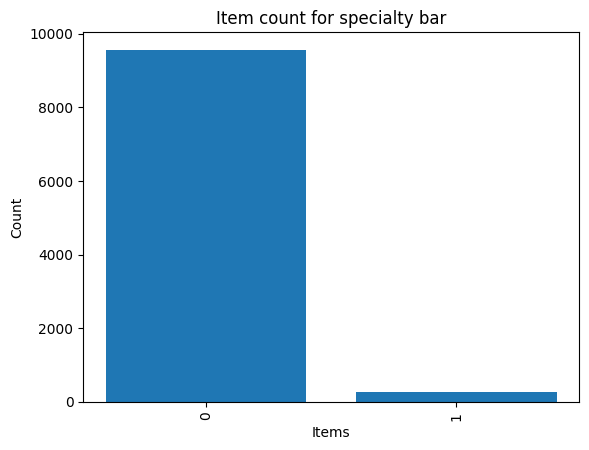

specialty bar   0    9566
1     269
Name: specialty bar, dtype: int64


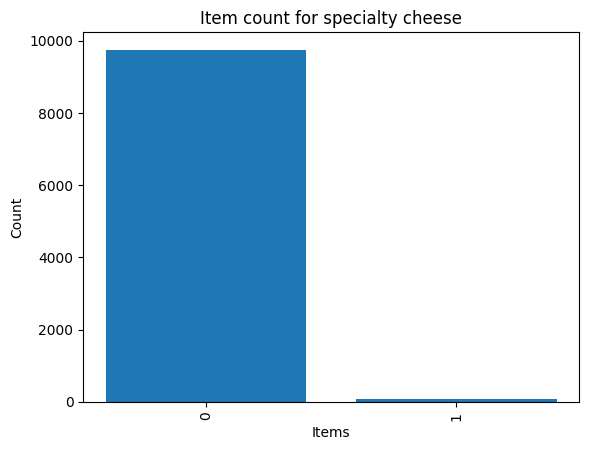

specialty cheese   0    9751
1      84
Name: specialty cheese, dtype: int64


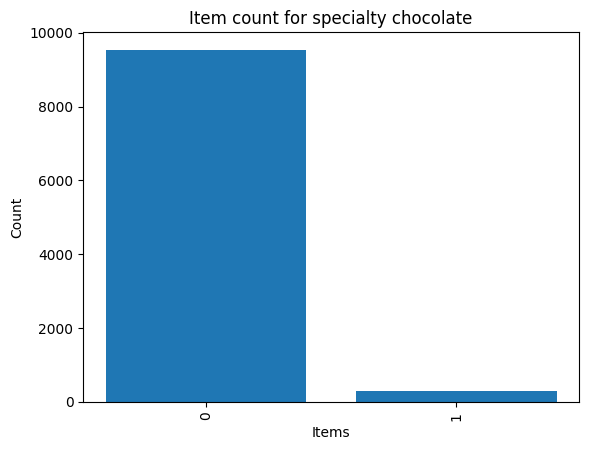

specialty chocolate   0    9536
1     299
Name: specialty chocolate, dtype: int64


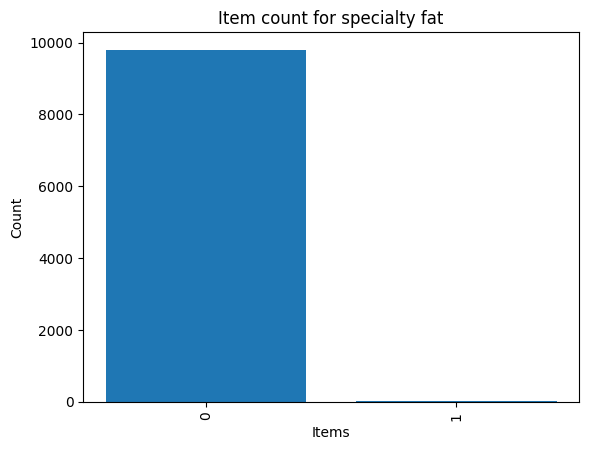

specialty fat   0    9799
1      36
Name: specialty fat, dtype: int64


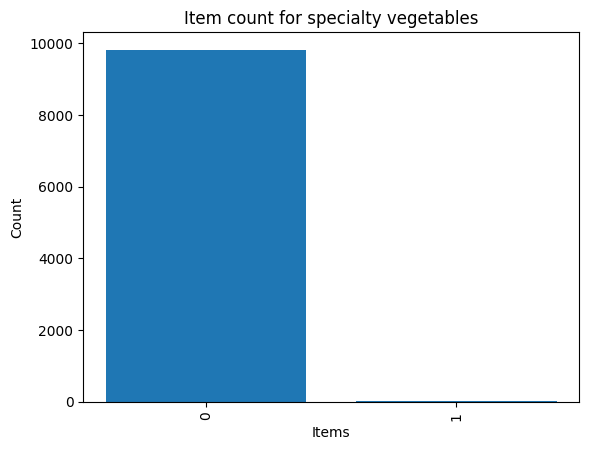

specialty vegetables   0    9818
1      17
Name: specialty vegetables, dtype: int64


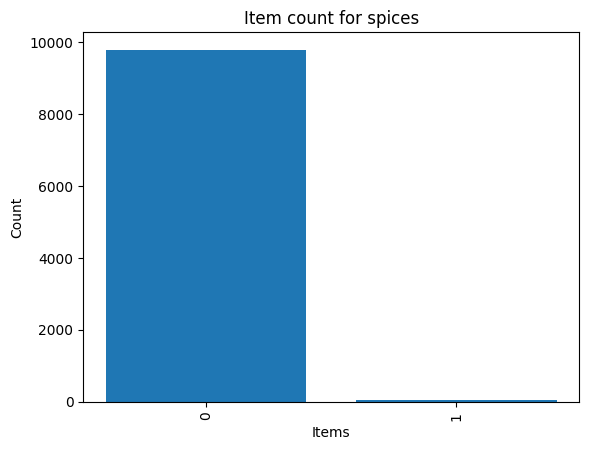

spices   0    9784
1      51
Name: spices, dtype: int64


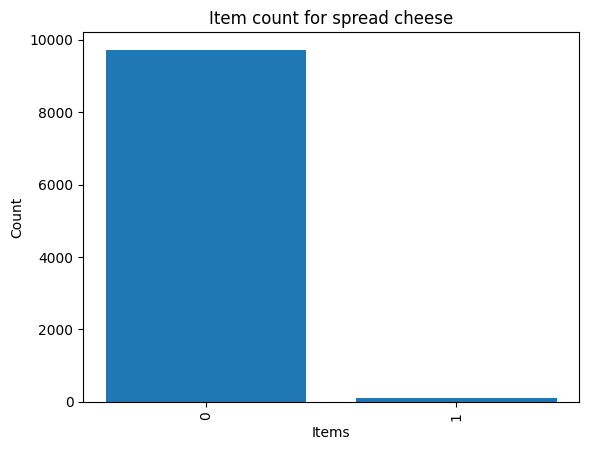

spread cheese   0    9725
1     110
Name: spread cheese, dtype: int64


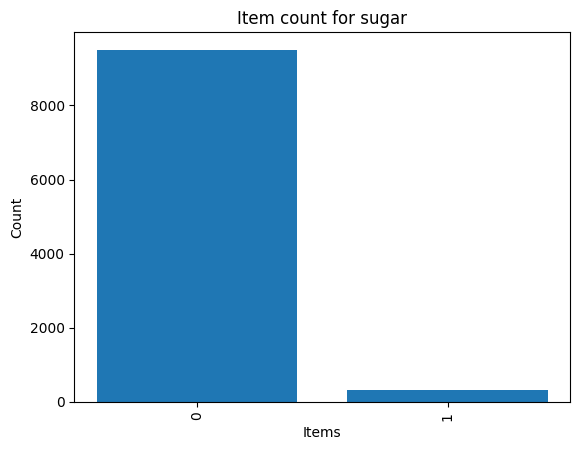

sugar   0    9502
1     333
Name: sugar, dtype: int64


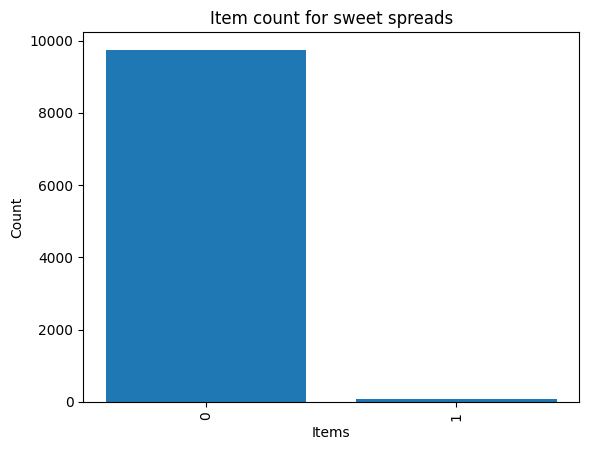

sweet spreads   0    9746
1      89
Name: sweet spreads, dtype: int64


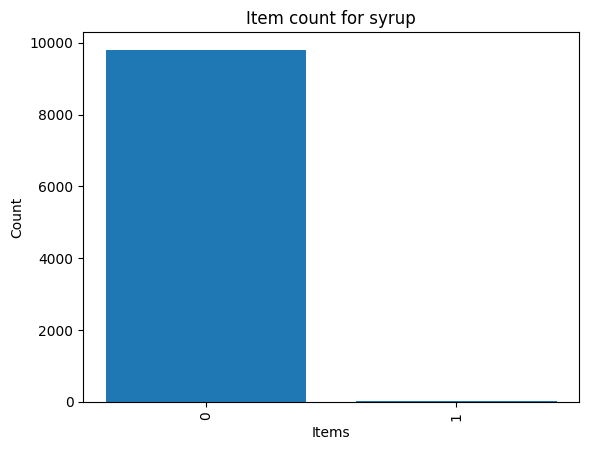

syrup   0    9803
1      32
Name: syrup, dtype: int64


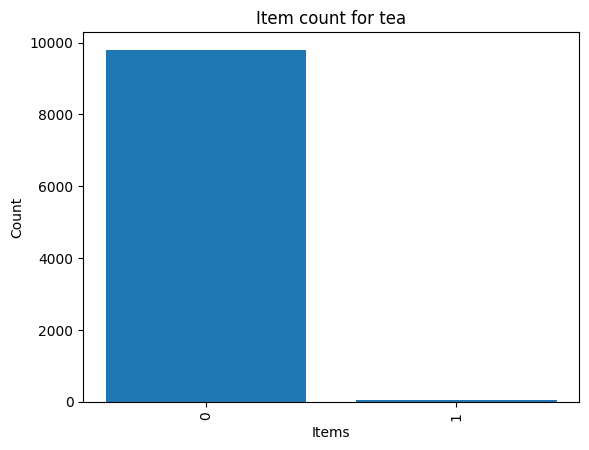

tea   0    9797
1      38
Name: tea, dtype: int64


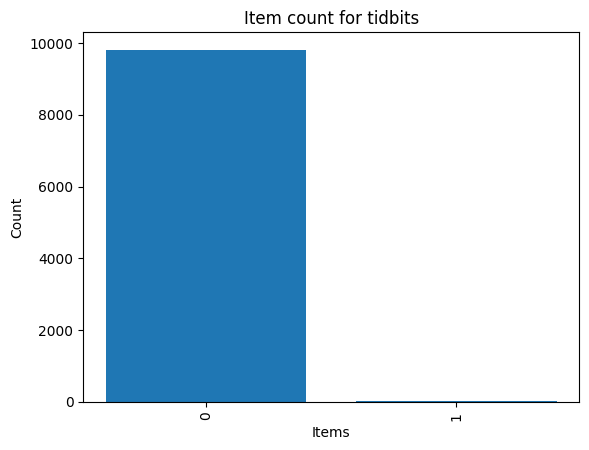

tidbits   0    9812
1      23
Name: tidbits, dtype: int64


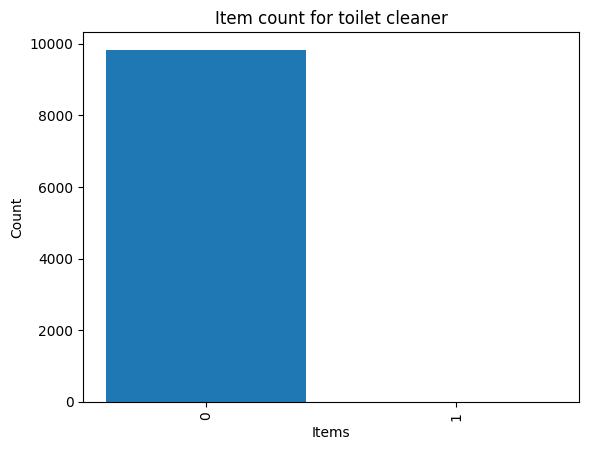

toilet cleaner   0    9828
1       7
Name: toilet cleaner, dtype: int64


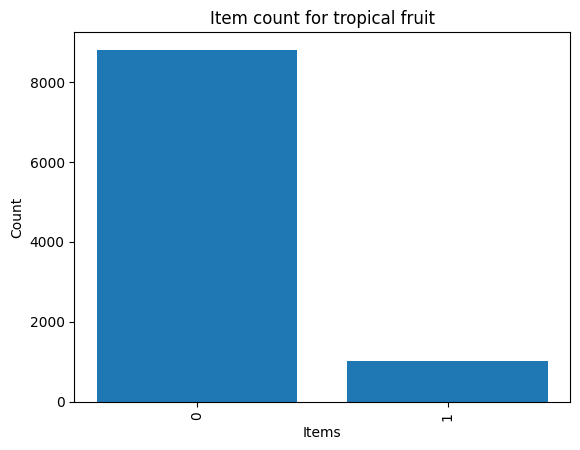

tropical fruit   0    8803
1    1032
Name: tropical fruit, dtype: int64


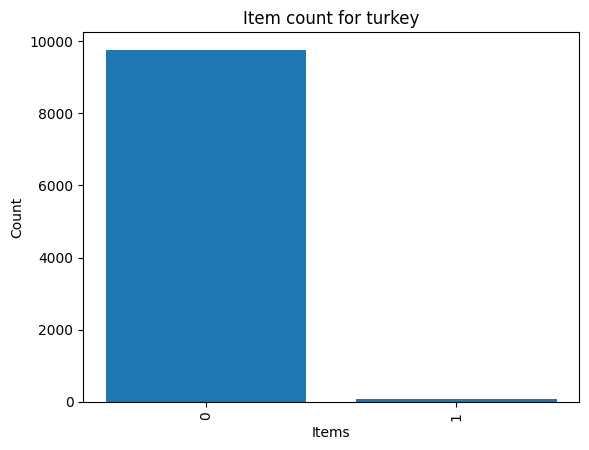

turkey   0    9755
1      80
Name: turkey, dtype: int64


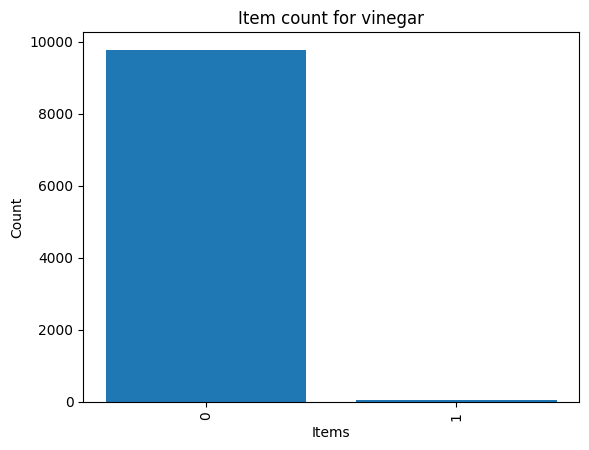

vinegar   0    9771
1      64
Name: vinegar, dtype: int64


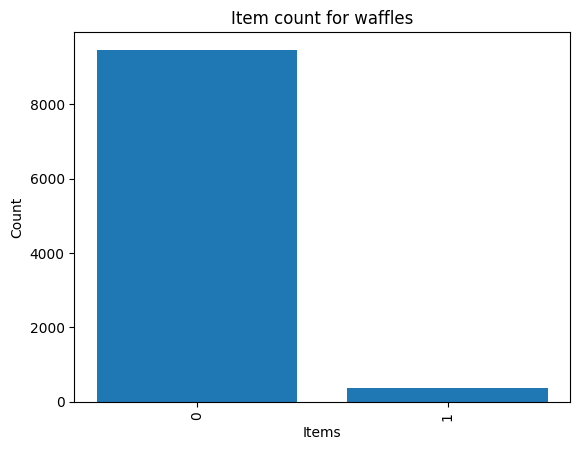

waffles   0    9457
1     378
Name: waffles, dtype: int64


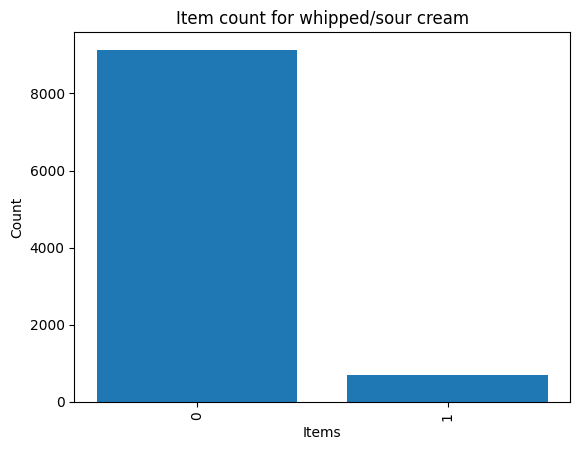

whipped/sour cream   0    9130
1     705
Name: whipped/sour cream, dtype: int64


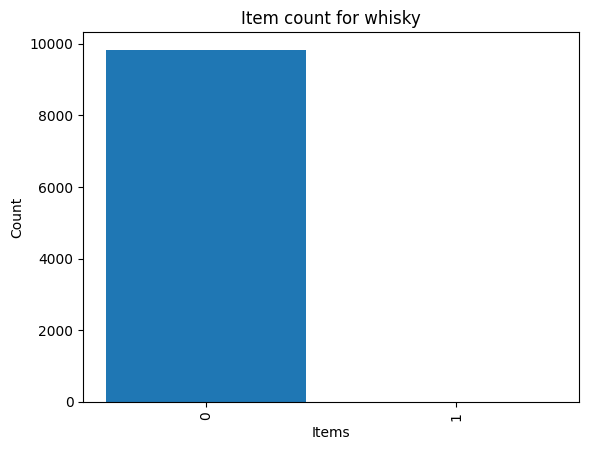

whisky   0    9827
1       8
Name: whisky, dtype: int64


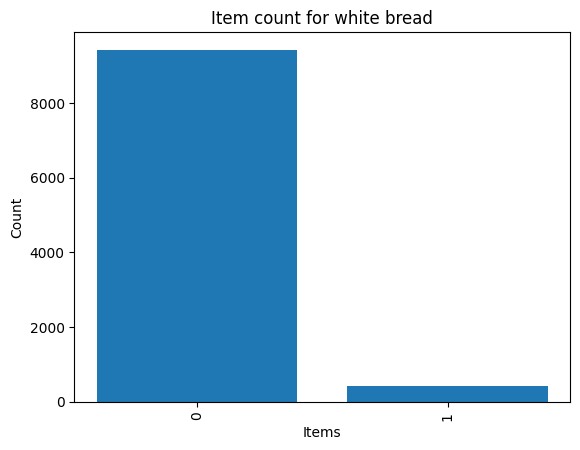

white bread   0    9421
1     414
Name: white bread, dtype: int64


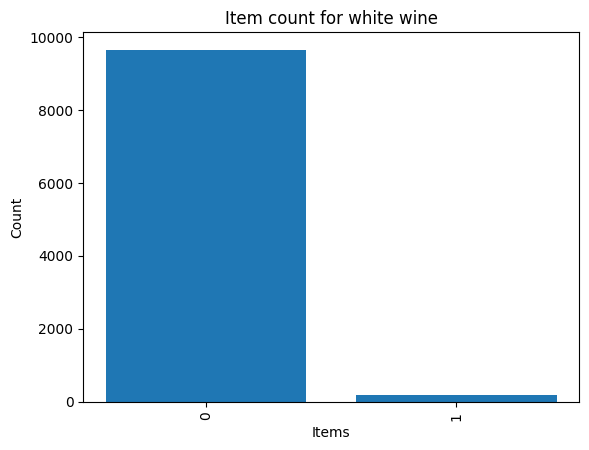

white wine   0    9648
1     187
Name: white wine, dtype: int64


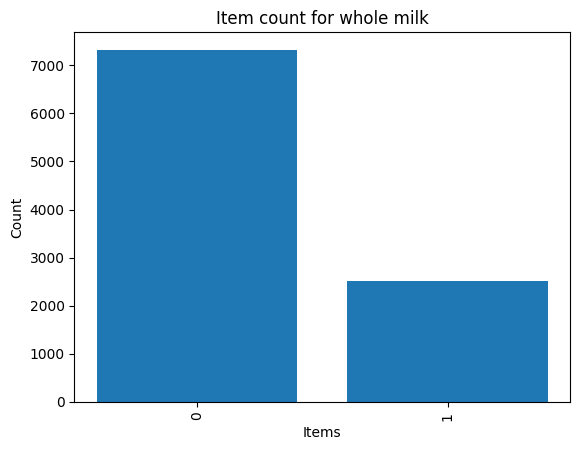

whole milk   0    7322
1    2513
Name: whole milk, dtype: int64


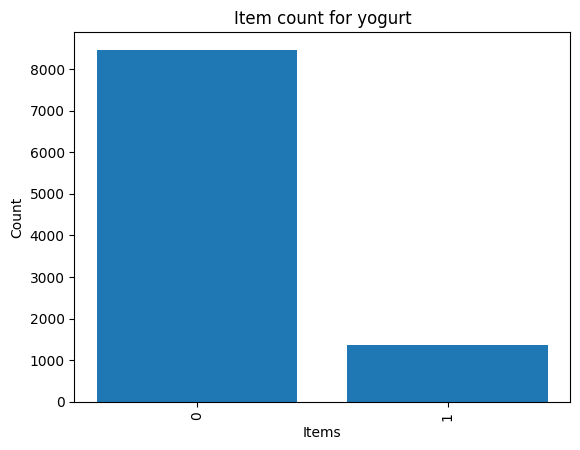

yogurt   0    8463
1    1372
Name: yogurt, dtype: int64


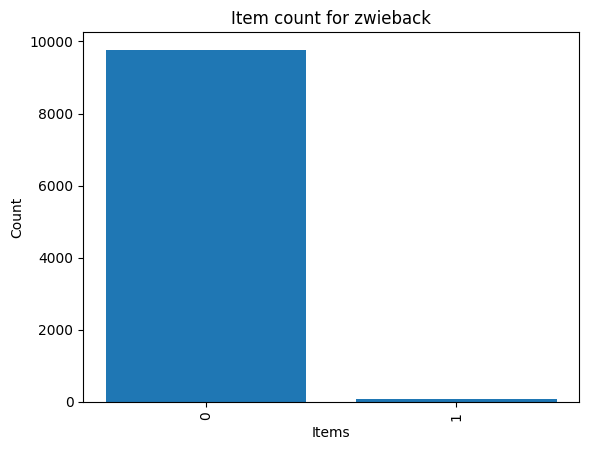

zwieback   0    9767
1      68
Name: zwieback, dtype: int64


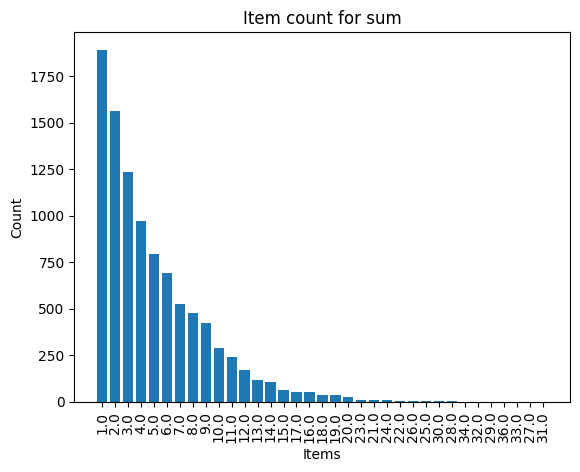

sum   1.0     1892
2.0     1562
3.0     1238
4.0      974
5.0      793
6.0      690
7.0      526
8.0      477
9.0      426
10.0     292
11.0     242
12.0     172
13.0     118
14.0     104
15.0      65
17.0      54
16.0      54
18.0      37
19.0      36
20.0      26
23.0      12
21.0      12
24.0       8
22.0       6
26.0       5
25.0       3
30.0       2
28.0       2
34.0       1
32.0       1
29.0       1
36.0       1
33.0       1
27.0       1
31.0       1
Name: sum, dtype: int64


In [ ]:
for col in df2.columns:
    counts = df2[col].value_counts()
    plt.bar(range(len(counts)), list(counts.values))
    plt.xticks(range(len(counts)), list(counts.index), rotation='vertical')
    plt.xlabel('Items')
    plt.ylabel('Count')
    plt.title(f'Item count for {col}')
    plt.show()
    print(col," ",df2[col].value_counts())

In [ ]:
col_name = df2.columns


In [ ]:
col_name

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'baby food', 'bags',
       'baking powder', 'bathroom cleaner', 'beef',
       ...
       'vinegar', 'waffles', 'whipped/sour cream', 'whisky', 'white bread',
       'white wine', 'whole milk', 'yogurt', 'zwieback', 'sum'],
      dtype='object', length=171)

تعداد تکرار هریک از ایتم ها را در زیر مشاهده می کنید

In [ ]:
my_dict = {}






for c in col_name:
  cc = df2[c].sum()
  my_dict[c]= df2[c].sum()
  print(f"The sum of column '{c}' is {cc}")

sorted_dict = dict(sorted(my_dict.items(), key=lambda x: x[1], reverse=True))
print(sorted_dict)

The sum of column 'Instant food products' is 79
The sum of column 'UHT-milk' is 329
The sum of column 'abrasive cleaner' is 35
The sum of column 'artif. sweetener' is 32
The sum of column 'baby cosmetics' is 6
The sum of column 'baby food' is 1
The sum of column 'bags' is 1085
The sum of column 'baking powder' is 174
The sum of column 'bathroom cleaner' is 27
The sum of column 'beef' is 516
The sum of column 'berries' is 327
The sum of column 'beverages' is 535
The sum of column 'bottled beer' is 792
The sum of column 'bottled water' is 1087
The sum of column 'brandy' is 41
The sum of column 'brown bread' is 638
The sum of column 'butter' is 820
The sum of column 'butter milk' is 275
The sum of column 'cake bar' is 130
The sum of column 'candles' is 88
The sum of column 'candy' is 294
The sum of column 'canned beer' is 764
The sum of column 'canned fish' is 148
The sum of column 'canned fruit' is 32
The sum of column 'canned vegetables' is 106
The sum of column 'cat food' is 229
The su

In [ ]:
max_val = max(sorted_dict.values())
min_val = min(sorted_dict.values())

print("Sorted Dictionary:", sorted_dict)
del sorted_dict['sum']
del sorted_dict['nan']



Sorted Dictionary: {'sum': 48721.0, 'whole milk': 2513, 'other vegetables': 1903, 'rolls/buns': 1809, 'soda': 1715, 'yogurt': 1372, 'cream': 1354, 'bottled water': 1087, 'bags': 1085, 'root vegetables': 1072, 'tropical fruit': 1032, 'shopping bags': 969, 'sausage': 946, 'chocolate': 901, 'pastry': 875, 'butter': 820, 'citrus fruit': 814, 'bottled beer': 792, 'newspapers': 785, 'canned beer': 764, 'pip fruit': 744, 'fruit/vegetable juice': 711, 'whipped/sour cream': 705, 'coffee': 644, 'brown bread': 638, 'domestic eggs': 624, 'meat': 623, 'ham': 583, 'frankfurter': 580, 'margarine': 576, 'curd': 574, 'pork': 567, 'beverages': 535, 'beef': 516, 'napkins': 515, 'salt': 478, 'frozen vegetables': 473, 'dessert': 471, 'chicken': 428, 'white bread': 414, 'cream cheese ': 390, 'waffles': 378, 'salty snack': 372, 'long life bakery product': 368, 'sugar': 333, 'UHT-milk': 329, 'berries': 327, 'hamburger meat': 327, 'hygiene articles': 324, 'onions': 305, 'oil': 302, 'specialty chocolate': 299, 

In [ ]:

max_name = max(sorted_dict, key=sorted_dict.get)
min_name = min(sorted_dict, key=sorted_dict.get)

print(f"The maximum value is {sorted_dict[max_name]} and its key is {max_name}")
print(f"The minimum value is {sorted_dict[min_name]} and its key is {min_name}")


The maximum value is 2513 and its key is whole milk
The minimum value is 1 and its key is baby food


In [ ]:
df_sorted = df2.sort_values('sum')

# Get the max and min age
max_sum = df_sorted['sum'].max()
min_sum = df_sorted['sum'].min()

# Print the max and min age
print(f"Max sum: {max_sum}")
print(f"Min sum: {min_sum}")


mean_sum = df_sorted['sum'].mean()
median_sum = df_sorted['sum'].median()

print(f"mean sum: {mean_sum}")
print(f"median sum: {median_sum}")

Max sum: 36.0
Min sum: 1.0
mean sum: 4.953838332486019
median sum: 4.0


In [ ]:
df3 = df2.head(100)

In [ ]:
df3

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
96,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,10.0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,3.0


In [ ]:
df4 = df3.iloc[:, :-1]


In [ ]:
df4

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


در تابع زیر ما الگوهای پرتکرار را بدست  می آوریم

In [ ]:


def get_frequent_item_sets(data, min_sup):
    item_set = set(data.columns)
    support_dict = {}
    #conf_dict ={} 
    l = len(item_set)
    for i in range(1, l+1):
        c = combinations(item_set, i)
        item_set_new = set()
        for j in c:
            #conf = sup[i[1]] / sup[i[0]]
            sup = data[list(j)].all(axis=1).mean()
            if sup >= min_sup:
                support_dict[j] = sup
                #conf_dict[j] = conf
                item_set_new |= set(j)
        item_set = item_set_new
    result = pd.DataFrame(list(support_dict.items()), columns=["items", "support"])
    return result

In [ ]:
freq=get_frequent_item_sets(df4,0.05)

In [ ]:
freq

,items,support
0,"(salt,)",0.05
1,"(newspapers,)",0.09
2,"(whole milk,)",0.25
3,"(pastry,)",0.09
4,"(coffee,)",0.07
5,"(meat,)",0.05
6,"(curd,)",0.07
7,"(yogurt,)",0.15
8,"(citrus fruit,)",0.09
9,"(chocolate,)",0.09


با استفاده از قطعه کد زیر ما قوانین یا در نظر گرفتن 
min_confidence
را بدست می آوریم 

In [ ]:

def get_arules(df, min_confidence):
    sup = pd.Series(df['support'].values, index=df['items']).to_dict()
    data = []
    for i in permutations(df['items'].values, 2):
        if set(i[0]).issubset(i[1]):
            conf = sup[i[1]] / sup[i[0]]
            if conf > min_confidence:
                j = next(iter(set(i[1]) - set(i[0]))),
                lift = sup[i[1]] / (sup[i[0]] * sup[j])
                data.append([i[0], j, sup[i[0]], sup[j], sup[i[1]], conf, lift])
    result = pd.DataFrame(data, columns=["antecedents", "consequents", "antecedent support", "consequent support", "support", "confidence", "lift"])
    return result

In [ ]:
association_rules=get_arules(freq, 0.2)

In [ ]:
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,"(whole milk,)","(other vegetables,)",0.25,0.17,0.07,0.280000,1.647059
1,"(whole milk,)","(yogurt,)",0.25,0.15,0.06,0.240000,1.600000
2,"(yogurt,)","(whole milk,)",0.15,0.25,0.06,0.400000,1.600000
3,"(sausage,)","(rolls/buns,)",0.08,0.21,0.05,0.625000,2.976190
4,"(whipped/sour cream,)","(cream,)",0.05,0.09,0.05,1.000000,11.111111
5,"(other vegetables,)","(rolls/buns,)",0.17,0.21,0.05,0.294118,1.400560
6,"(other vegetables,)","(root vegetables,)",0.17,0.09,0.05,0.294118,3.267974
7,"(other vegetables,)","(whole milk,)",0.17,0.25,0.07,0.411765,1.647059
8,"(rolls/buns,)","(sausage,)",0.21,0.08,0.05,0.238095,2.976190
9,"(rolls/buns,)","(other vegetables,)",0.21,0.17,0.05,0.238095,1.400560


In [ ]:
df5 = df2.iloc[:, :-1]


In [ ]:
df5

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequencies=get_frequent_item_sets(df5,0.05)

In [ ]:
frequencies

,items,support
0,"(pork,)",0.057651
1,"(bags,)",0.110320
2,"(frankfurter,)",0.058973
3,"(beef,)",0.052466
4,"(newspapers,)",0.079817
5,"(whole milk,)",0.255516
6,"(pastry,)",0.088968
7,"(coffee,)",0.065480
8,"(pip fruit,)",0.075648
9,"(shopping bags,)",0.098526


In [ ]:
association_rules=get_arules(frequencies, 0.2)
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confident,lift
0,"(bags,)","(shopping bags,)",0.110320,0.098526,0.100051,0.906912,9.204834
1,"(whole milk,)","(other vegetables,)",0.255516,0.193493,0.074835,0.292877,1.513634
2,"(whole milk,)","(rolls/buns,)",0.255516,0.183935,0.056634,0.221647,1.205032
3,"(whole milk,)","(yogurt,)",0.255516,0.139502,0.056024,0.219260,1.571735
4,"(whole milk,)","(cream,)",0.255516,0.137672,0.055008,0.215281,1.563725
5,"(shopping bags,)","(bags,)",0.098526,0.110320,0.100051,1.015480,9.204834
6,"(yogurt,)","(whole milk,)",0.139502,0.255516,0.056024,0.401603,1.571735
7,"(whipped/sour cream,)","(cream,)",0.071683,0.137672,0.080935,1.129078,8.201242
8,"(other vegetables,)","(whole milk,)",0.193493,0.255516,0.074835,0.386758,1.513634
9,"(rolls/buns,)","(whole milk,)",0.183935,0.255516,0.056634,0.307905,1.205032


In [ ]:
association_rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confident,lift
0,"(bags,)","(shopping bags,)",0.110320,0.098526,0.100051,0.906912,9.204834
5,"(shopping bags,)","(bags,)",0.098526,0.110320,0.100051,1.015480,9.204834
7,"(whipped/sour cream,)","(cream,)",0.071683,0.137672,0.080935,1.129078,8.201242
11,"(cream,)","(whipped/sour cream,)",0.137672,0.071683,0.080935,0.587888,8.201242
3,"(whole milk,)","(yogurt,)",0.255516,0.139502,0.056024,0.219260,1.571735
6,"(yogurt,)","(whole milk,)",0.139502,0.255516,0.056024,0.401603,1.571735
4,"(whole milk,)","(cream,)",0.255516,0.137672,0.055008,0.215281,1.563725
10,"(cream,)","(whole milk,)",0.137672,0.255516,0.055008,0.399557,1.563725
1,"(whole milk,)","(other vegetables,)",0.255516,0.193493,0.074835,0.292877,1.513634
8,"(other vegetables,)","(whole milk,)",0.193493,0.255516,0.074835,0.386758,1.513634
